In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)


In [3]:
df.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

In [4]:
df.describe()

0            1            2            3            4    \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000   
mean     -0.262502    -1.649828    -2.492623    -3.119754    -3.167656   
std       1.152450     1.445542     1.386457     1.302921     1.104535   
min      -6.729499    -7.090374    -5.132459    -5.363241    -5.375715   
25%      -1.004220    -2.701936    -3.668585    -4.227337    -4.007630   
50%      -0.297541    -1.661892    -2.586129    -3.388210    -3.469899   
75%       0.499909    -0.677998    -1.514187    -2.235690    -2.531153   
max       4.966414     3.479689     2.660597     1.899798     2.147015   

               5            6            7            8            9    ...  \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000  ...   
mean     -2.866306    -2.272845    -1.797754    -1.409784    -0.935806  ...   
std       0.906312     0.731594     0.622794     0.636863     0.657788  ...   
min      -5.330194    -4.782240    -4.311288    -4.071361    -4.142476  ...   
25%      -3.480666    -2.779832    -2.165808    -1.773870    -1.362003  ...   
50%      -2.947061    -2.285427    -1.750084    -1.422457    -0.910384  ...   
75%      -2.398797    -1.823480    -1.484107    -1.063592    -0.476477  ...   
max       1.614375     1.868728     1.804251     1.683730     1.898627  ...   

               131          132          133          134          135  \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000   
mean      0.071312    -0.062622    -0.276086    -0.507750    -0.761323   
std       1.404425     1.646105     1.894515     2.059366     2.086130   
min      -4.167040    -4.557576    -4.530488    -4.563270    -5.150100   
25%      -1.087720    -1.588237    -2.146835    -2.730750    -3.031224   
50%       0.658318     0.717808     0.604747     0.334857    -0.030767   
75%       1.169392     1.238651     1.264379     1.234408     1.033957   
max       3.007606     2.854680     2.912394     2.937685     3.351437   

               136          137          138          139          140  
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000  
mean     -0.835173    -0.642739    -0.487667    -0.706574     0.584034  
std       2.056296     1.859409     1.831088     1.414414     0.492937  
min      -4.880460    -5.496107    -5.880890    -6.092227     0.000000  
25%      -2.868603    -2.154560    -1.658289    -1.596809     0.000000  
50%      -0.195151    -0.194423    -0.160262    -0.568443     1.000000  
75%       0.945027     0.951621     1.002628     0.271635     1.000000  
max       3.432519     3.579448     4.425976     7.402103     1.000000  

[8 rows x 141 columns]

In [5]:
df.shape

(4998, 141)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [7]:
df=df.values
X=df[:,:-1]
Y=df[:,-1]

In [8]:
X.shape

(4998, 140)

In [9]:
Y.shape

(4998,)

In [10]:
X

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.12343082,
         0.92528624,  0.19313742],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  0.77381971,
         1.1196209 , -1.4362499 ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.32109663,
         0.90422673, -0.42179659],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.874136  ,
        -2.0083694 , -1.8083338 ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.261335  ,
         1.1504486 ,  0.80493225],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -2.2600228 ,
        -1.577823  , -0.68453092]])

In [11]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

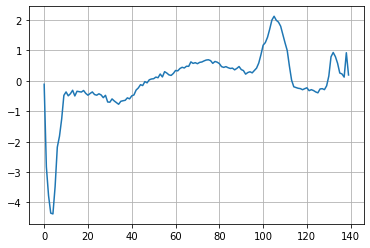

In [12]:
plt.plot(X[0])
plt.grid()

<ipython-input-13-952a58c820e8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


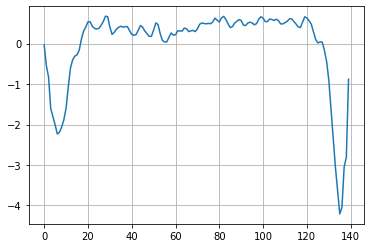

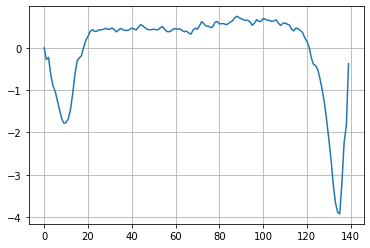

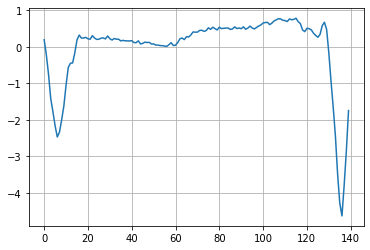

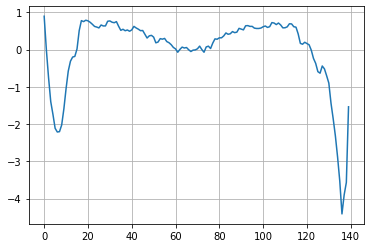

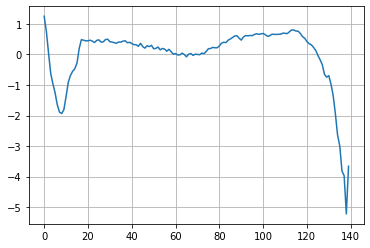

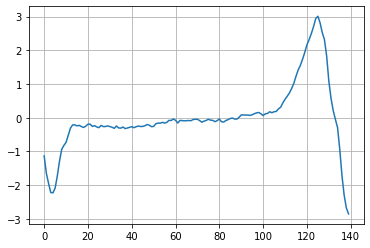

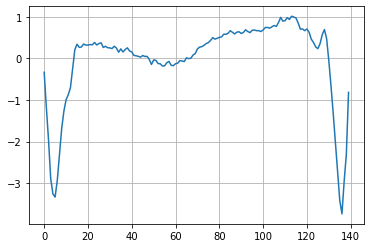

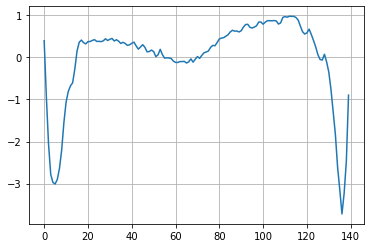

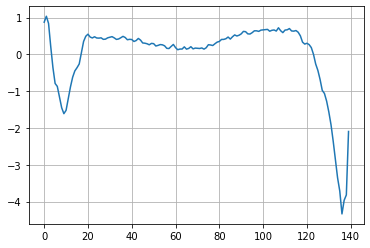

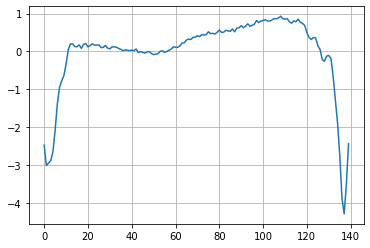

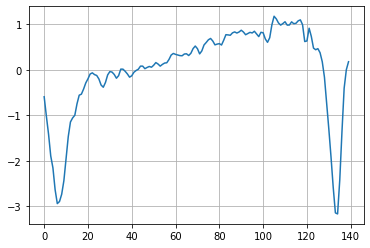

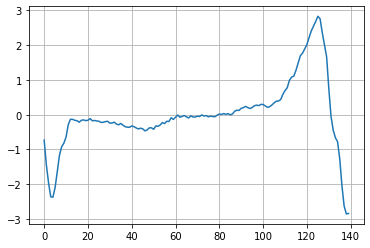

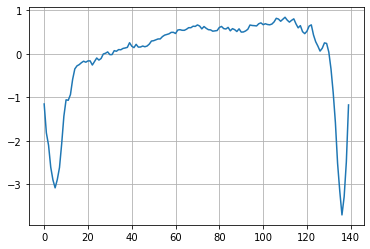

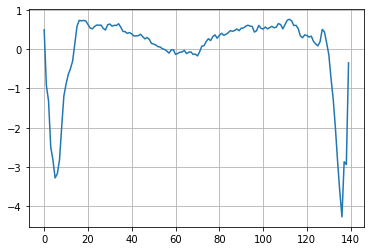

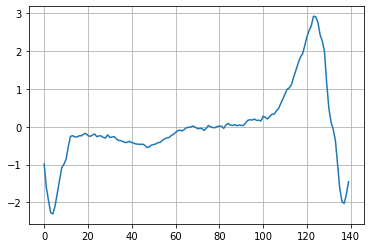

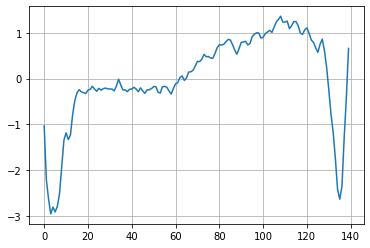

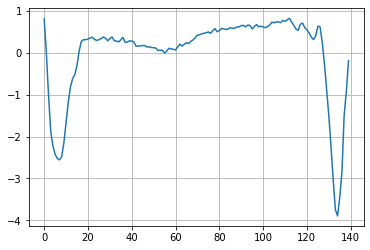

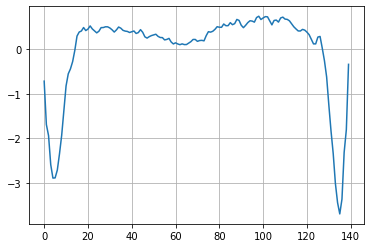

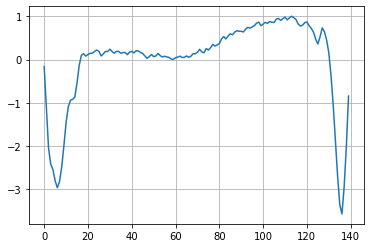

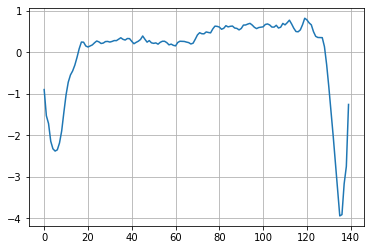

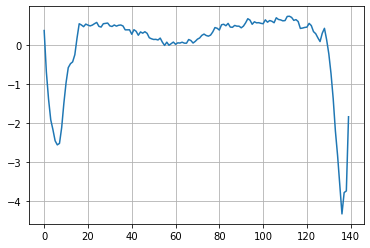

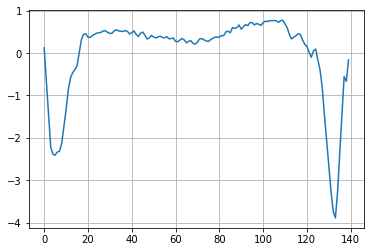

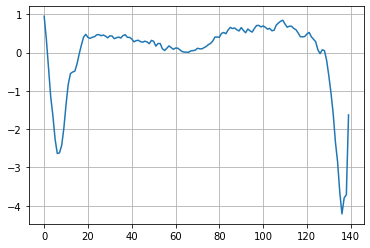

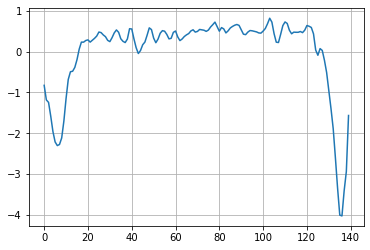

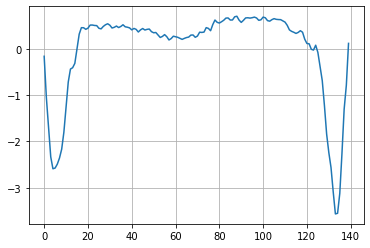

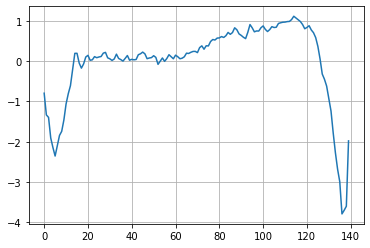

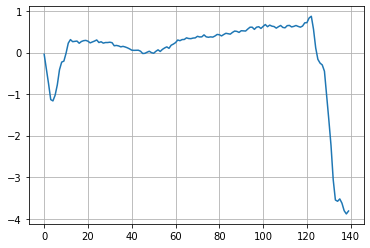

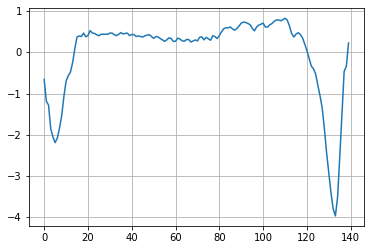

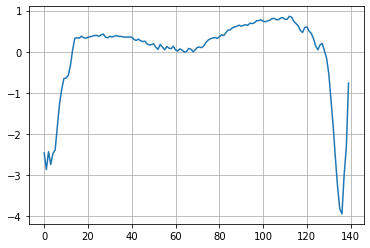

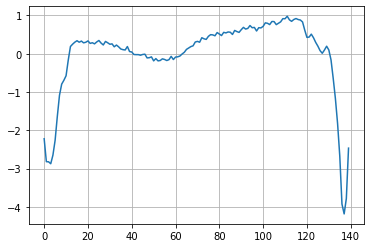

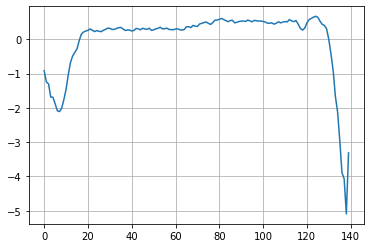

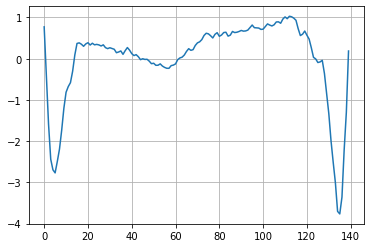

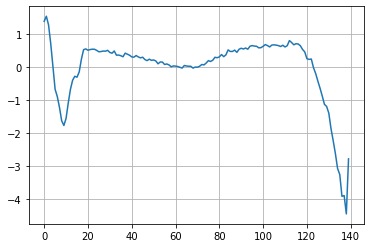

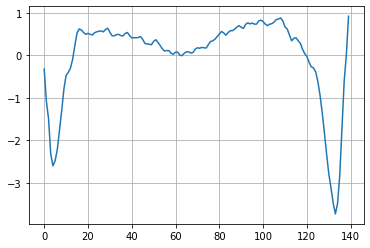

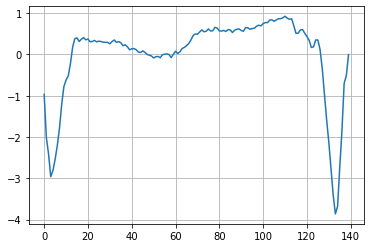

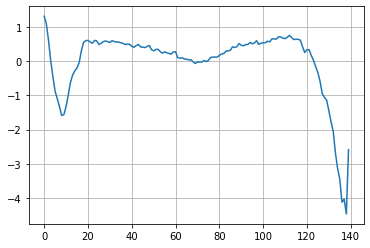

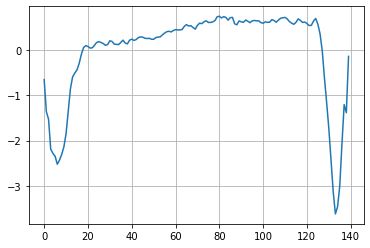

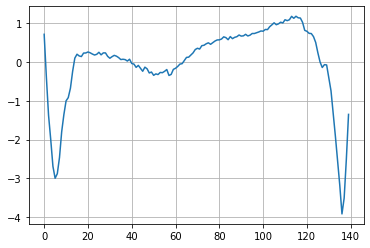

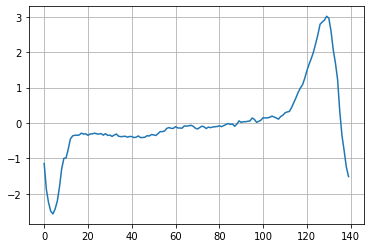

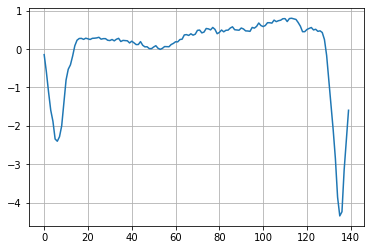

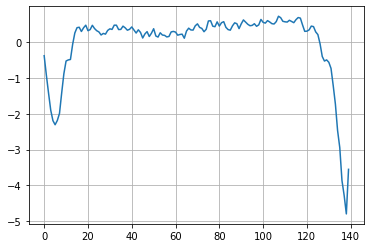

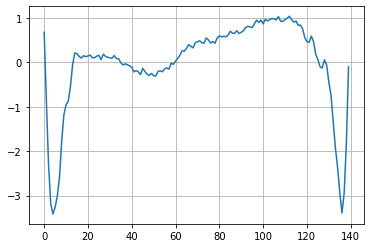

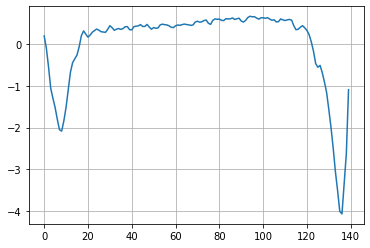

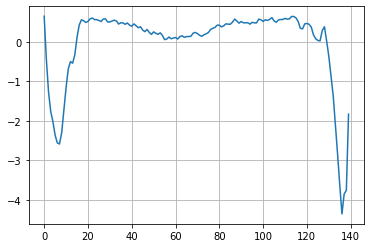

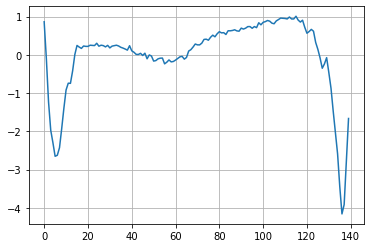

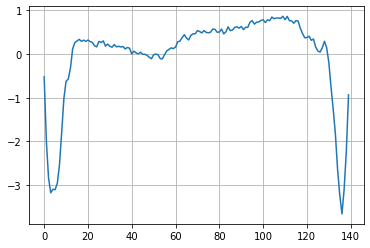

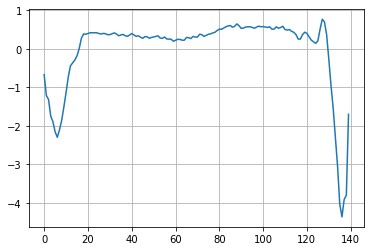

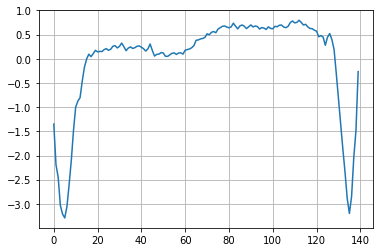

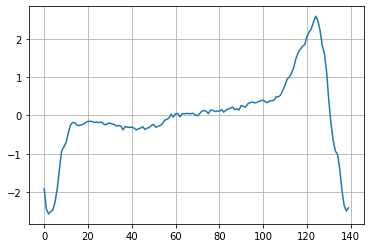

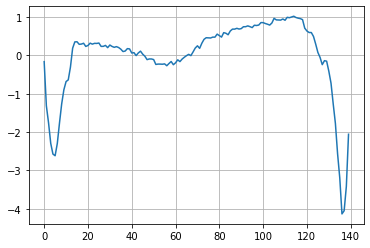

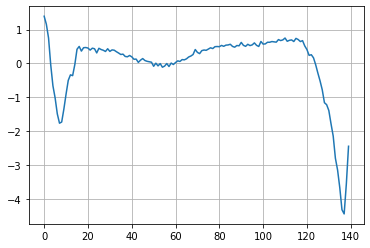

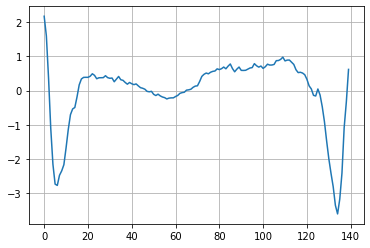

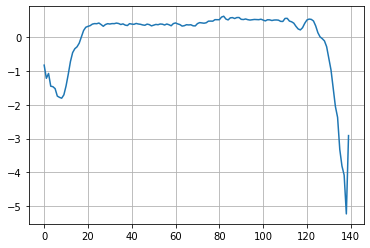

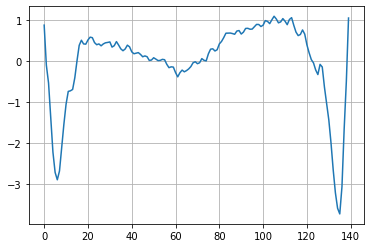

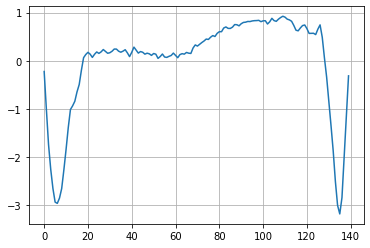

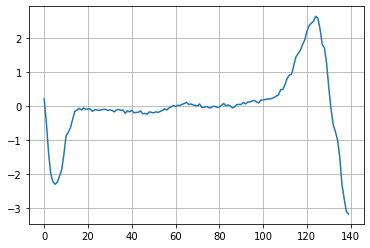

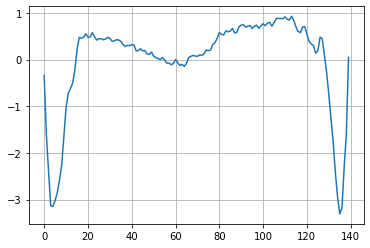

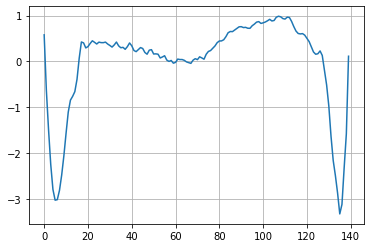

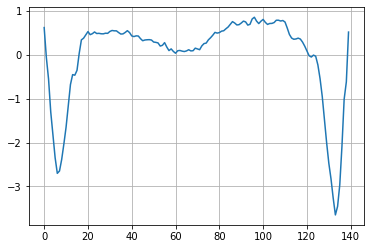

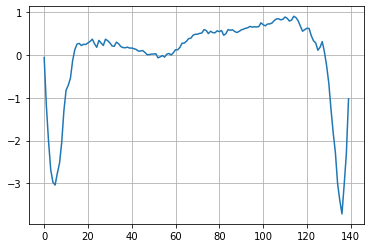

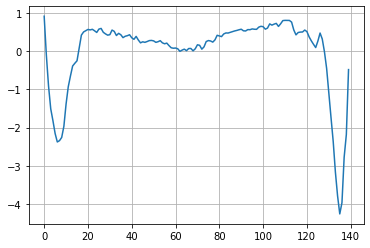

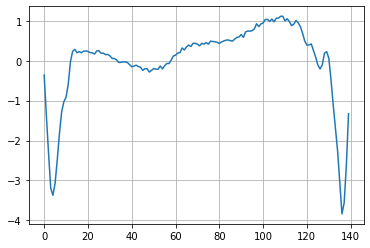

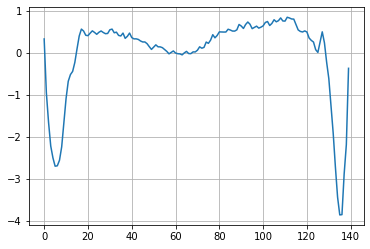

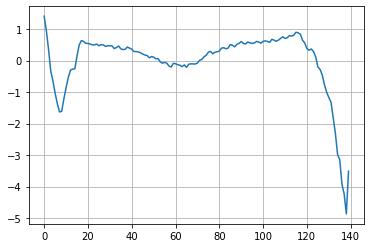

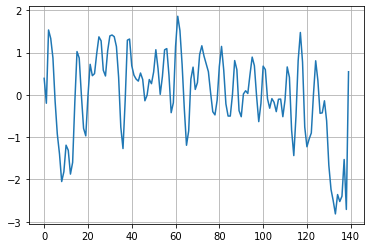

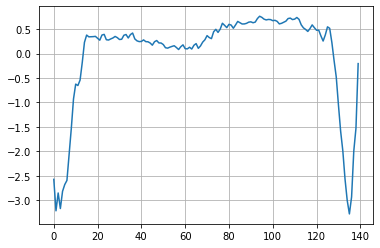

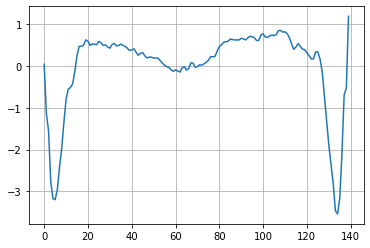

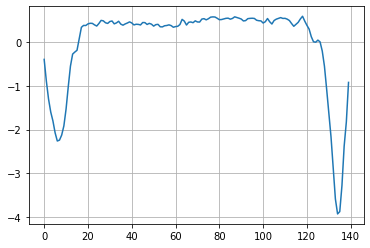

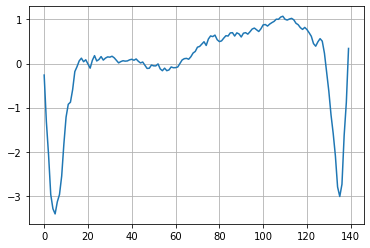

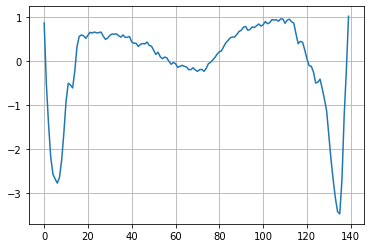

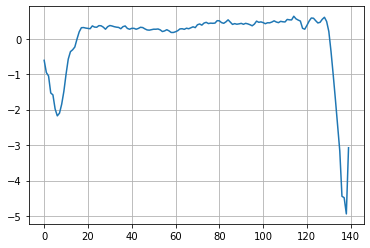

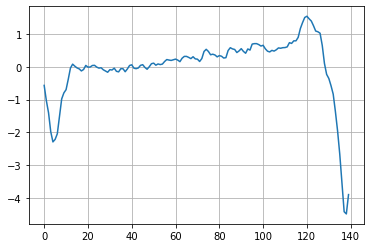

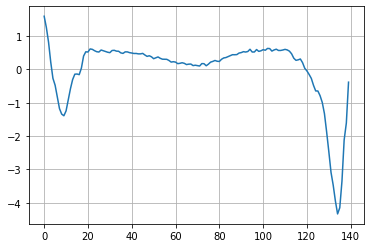

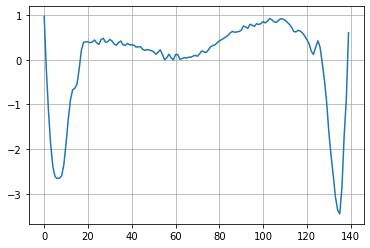

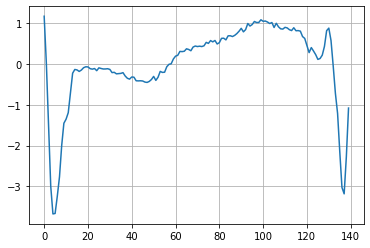

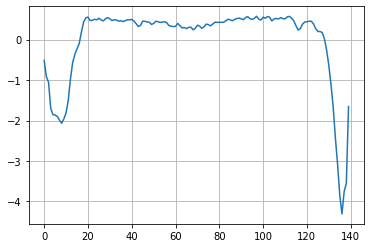

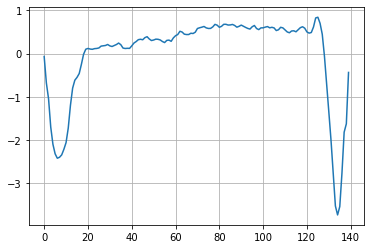

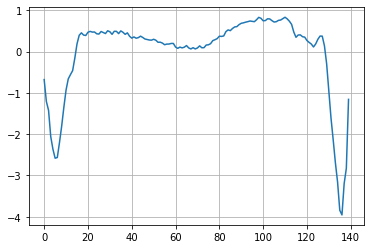

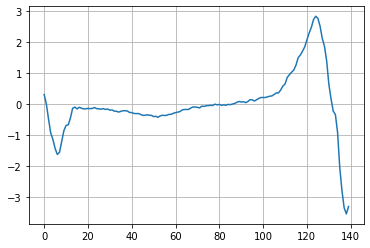

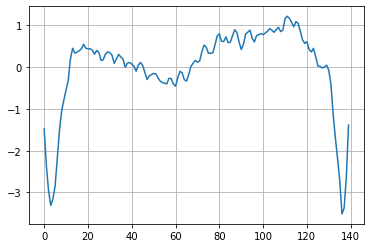

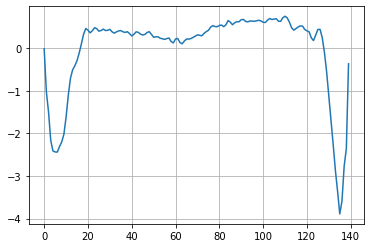

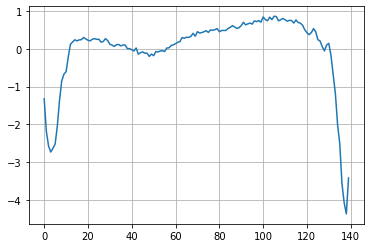

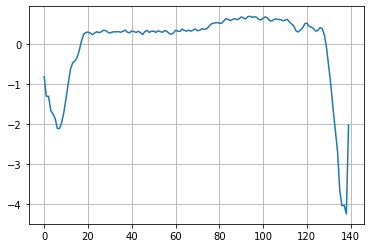

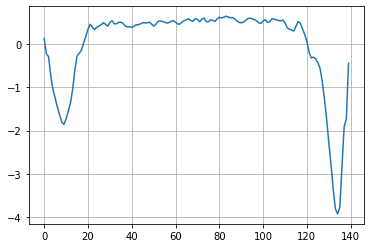

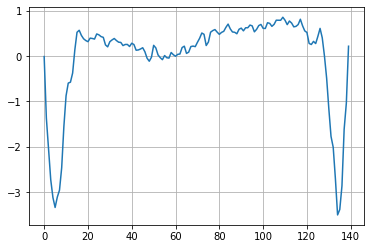

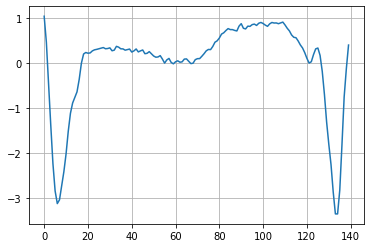

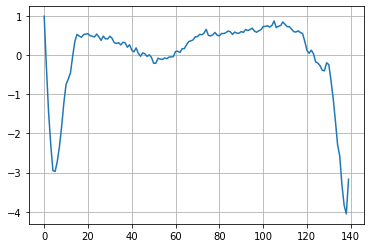

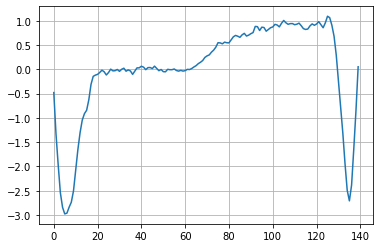

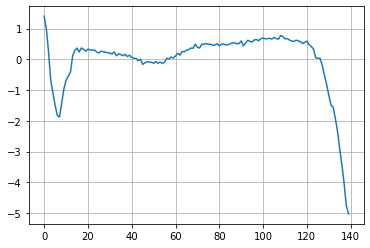

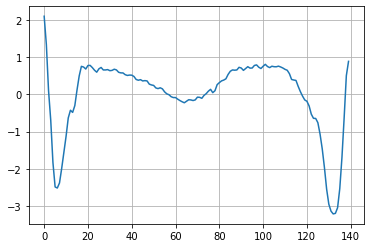

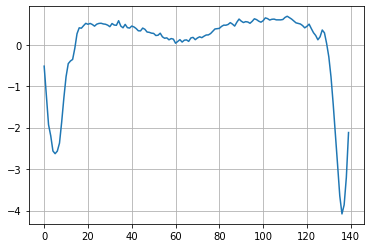

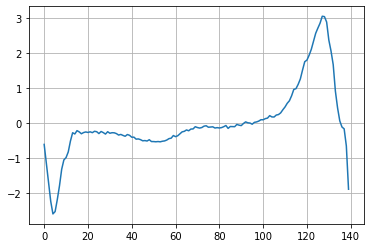

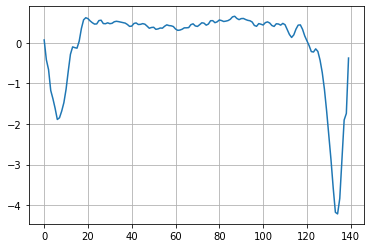

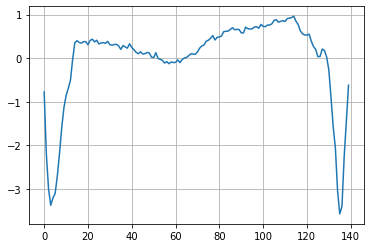

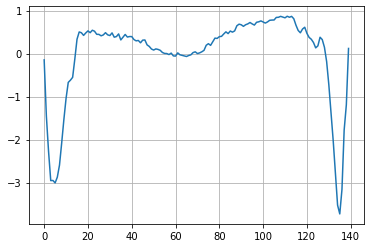

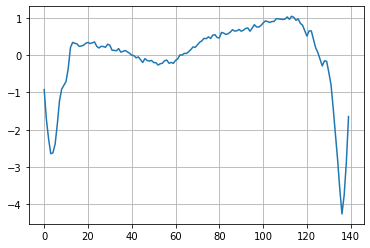

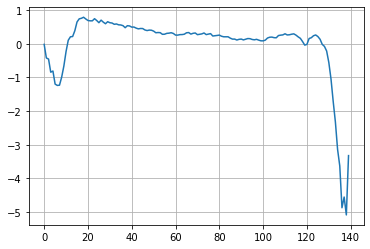

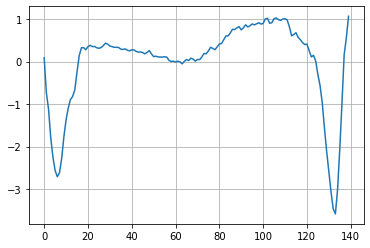

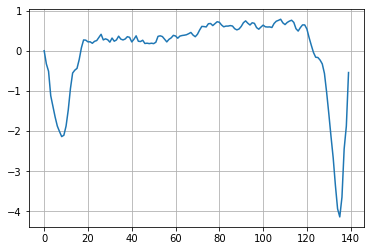

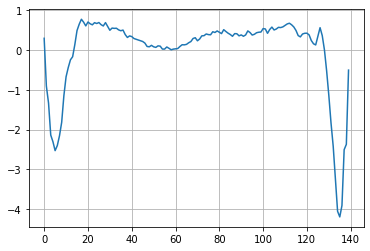

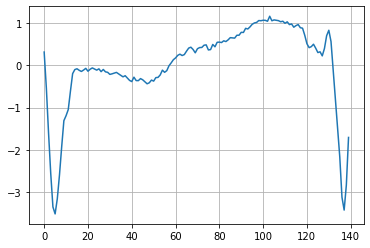

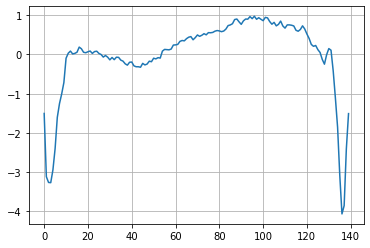

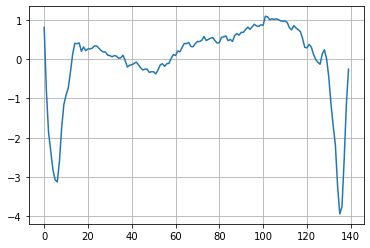

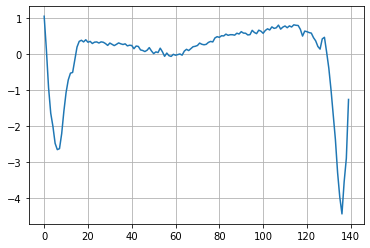

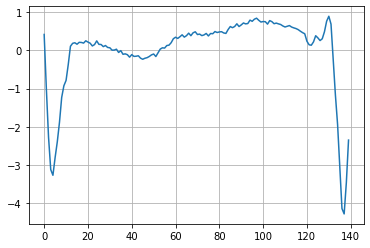

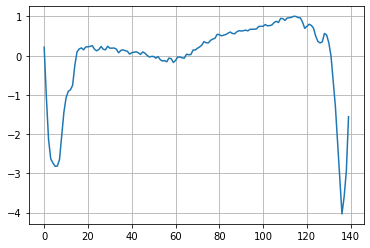

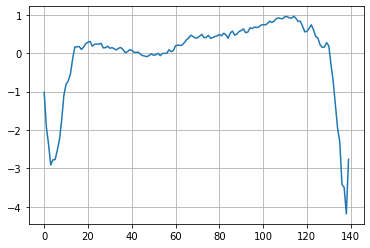

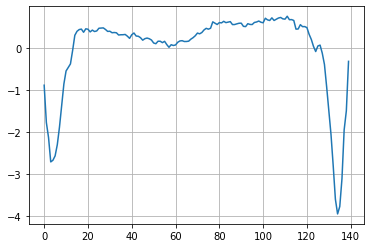

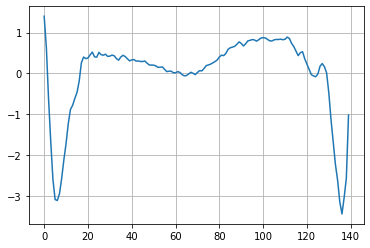

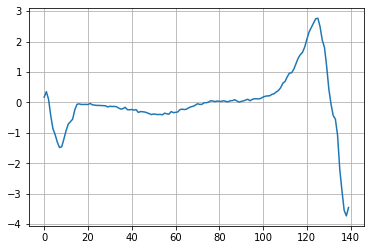

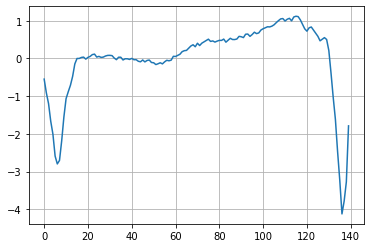

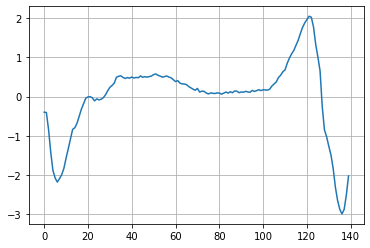

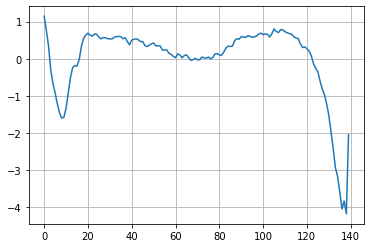

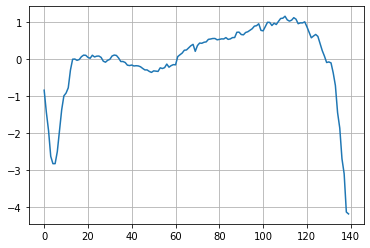

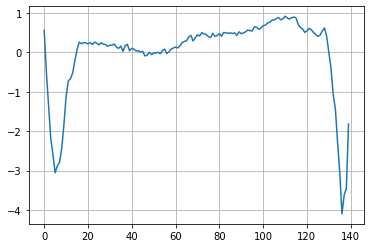

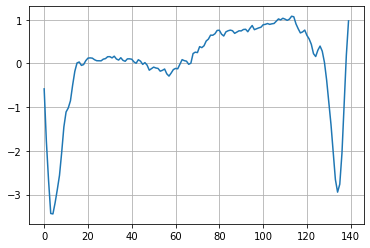

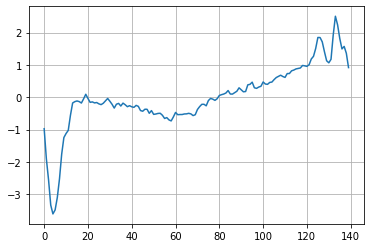

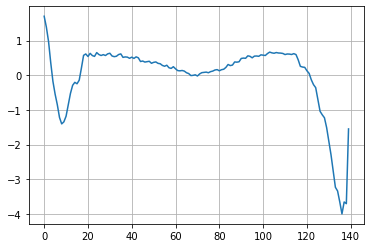

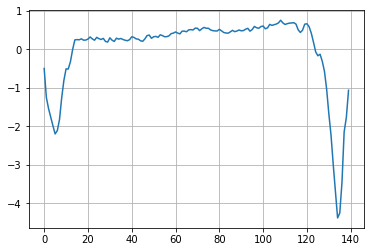

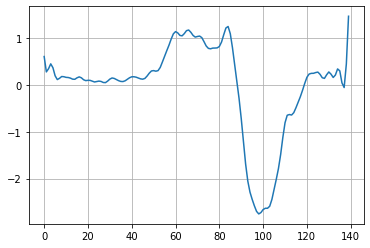

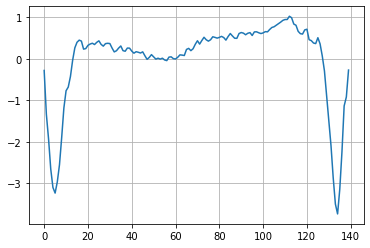

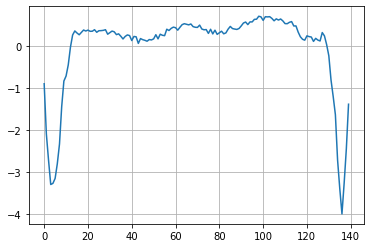

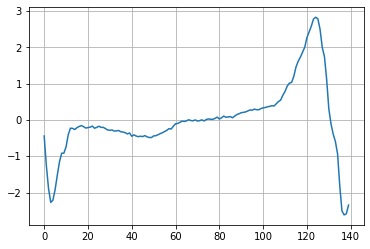

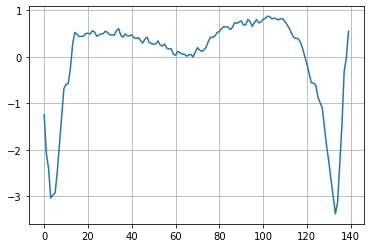

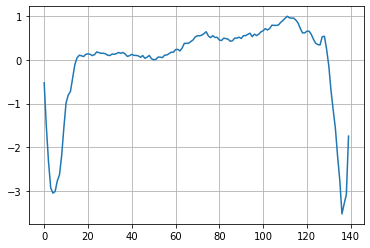

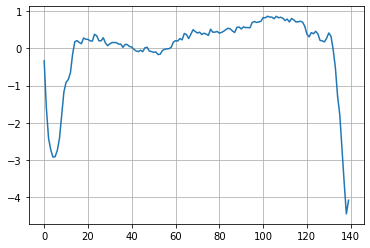

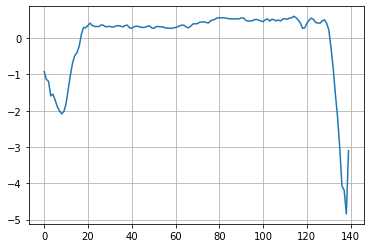

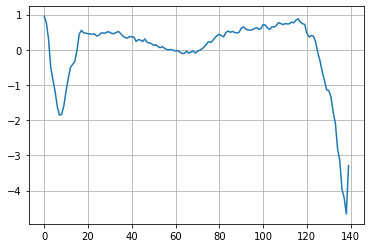

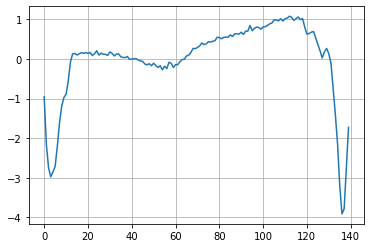

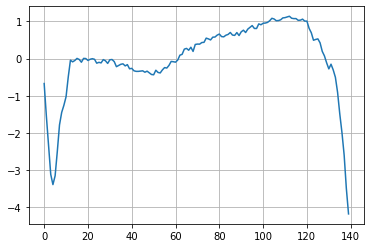

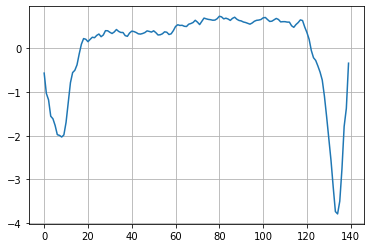

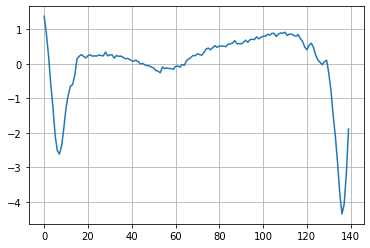

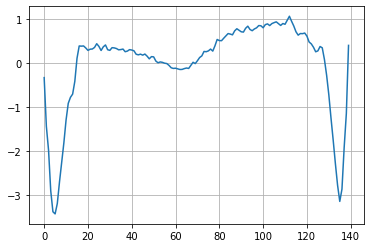

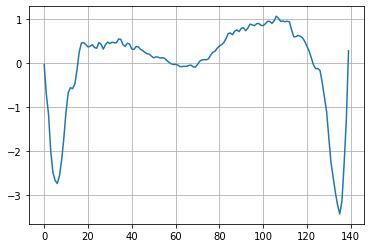

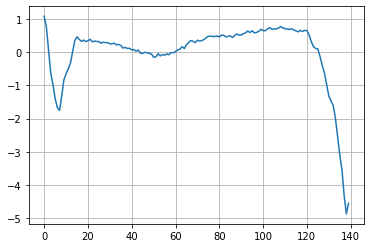

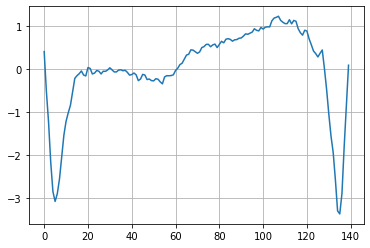

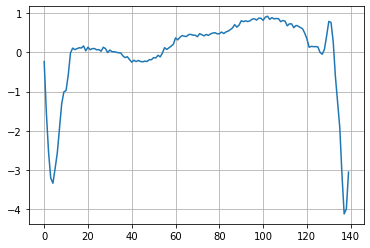

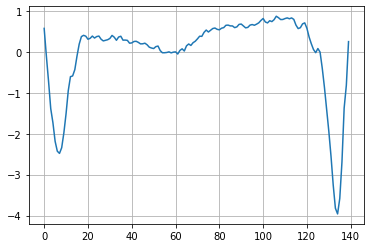

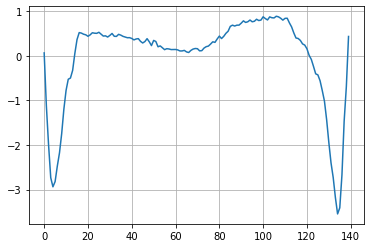

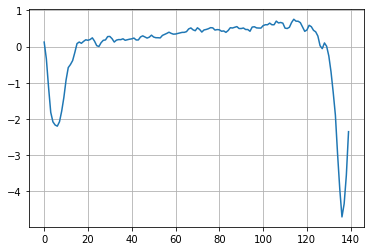

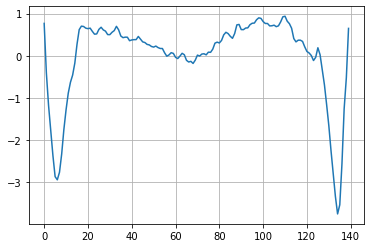

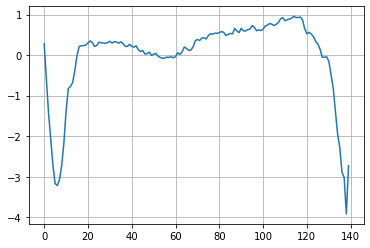

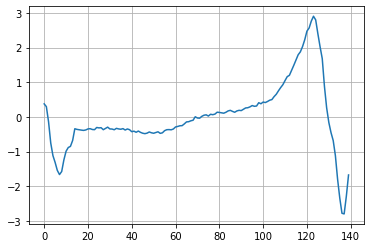

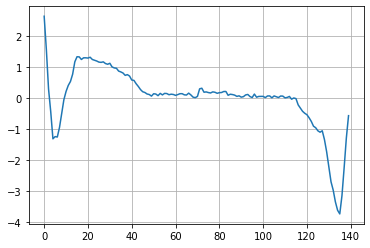

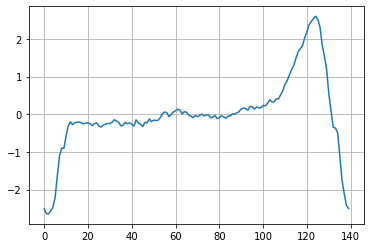

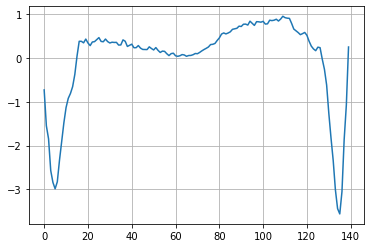

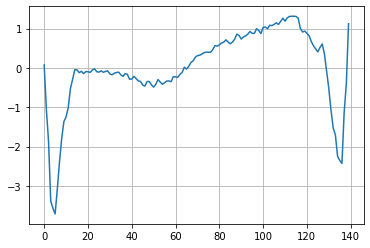

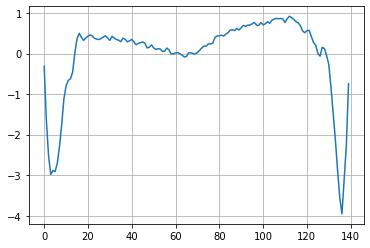

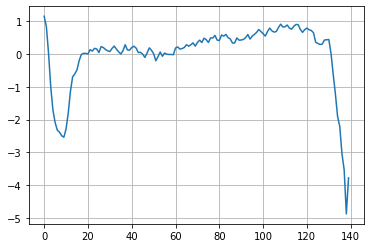

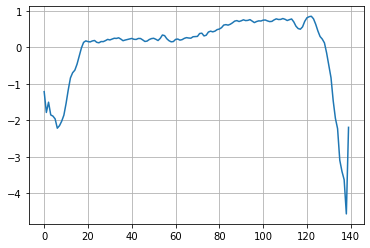

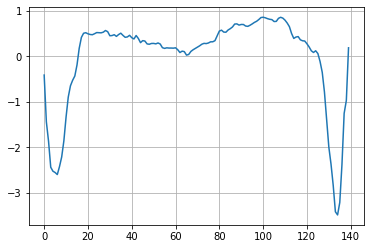

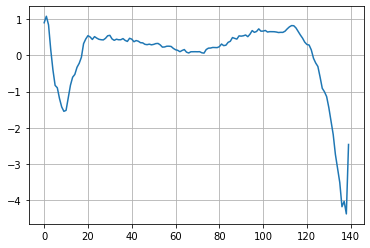

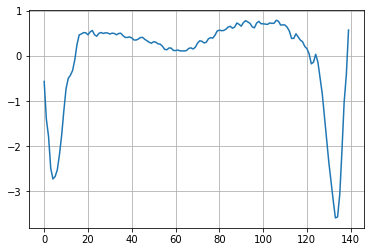

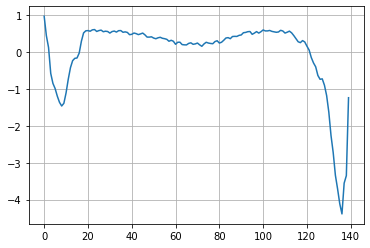

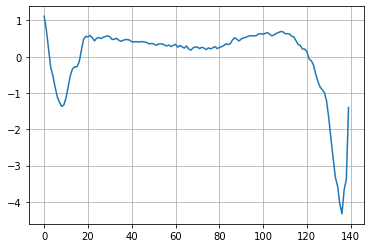

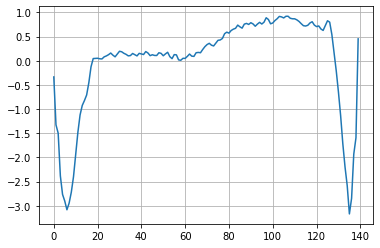

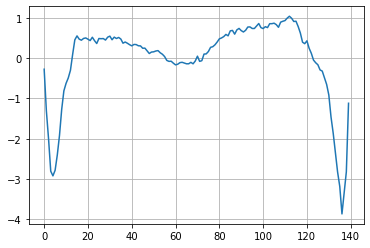

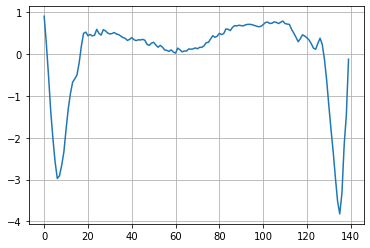

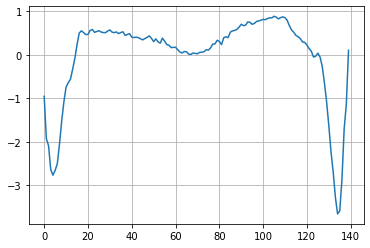

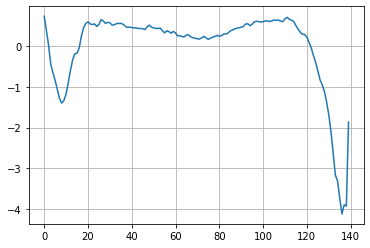

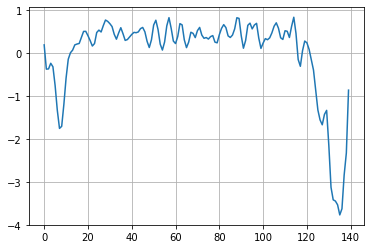

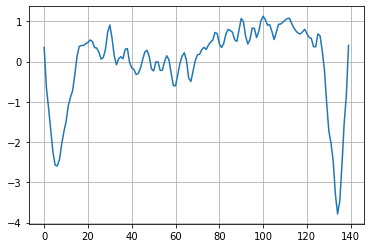

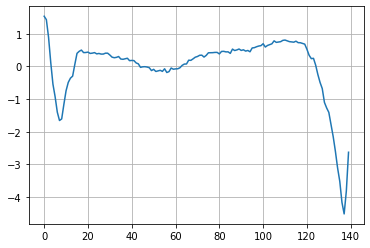

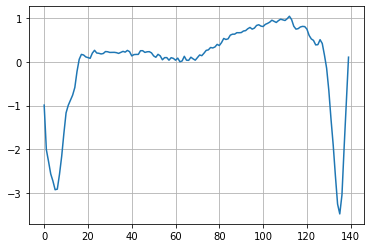

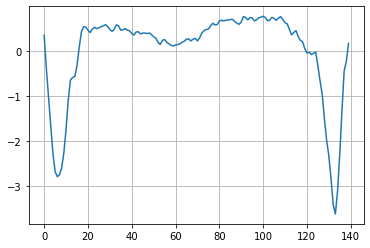

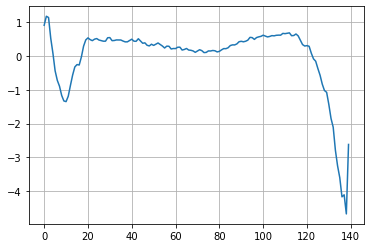

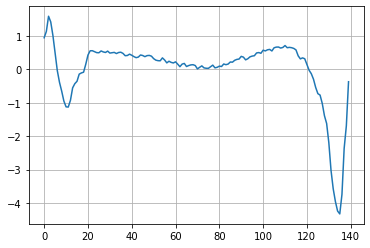

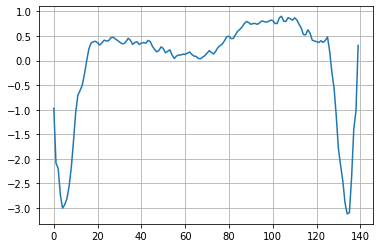

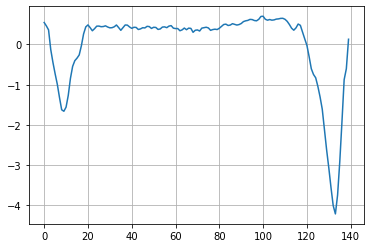

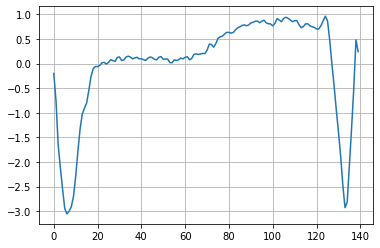

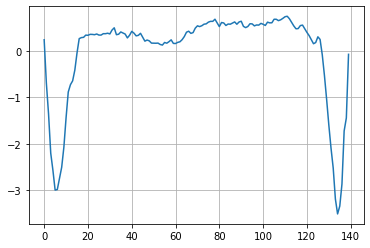

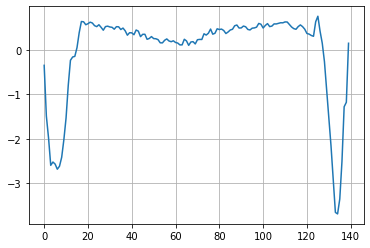

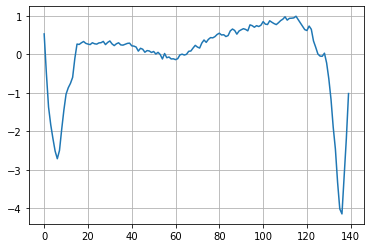

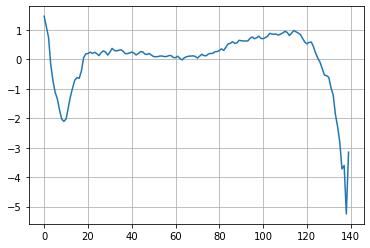

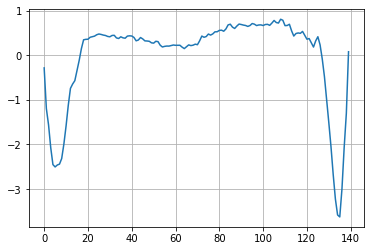

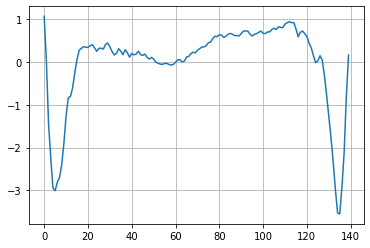

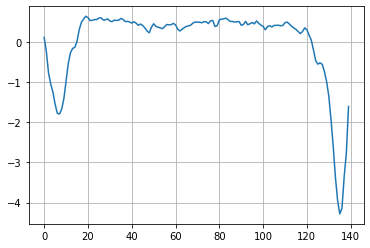

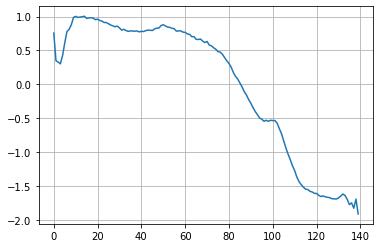

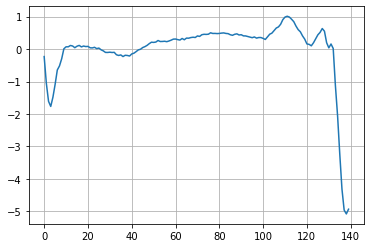

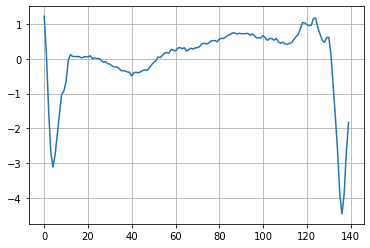

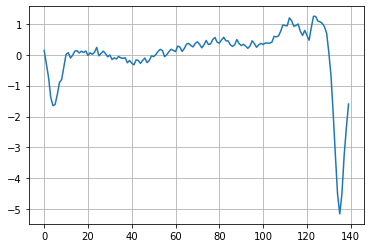

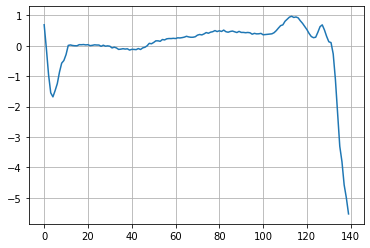

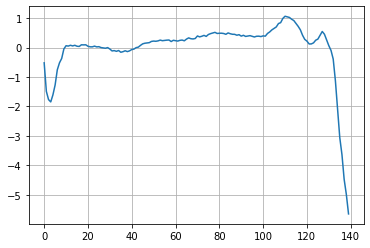

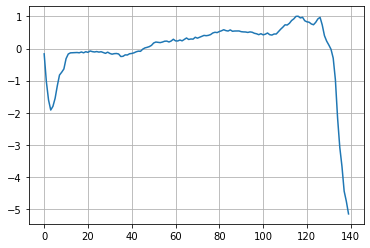

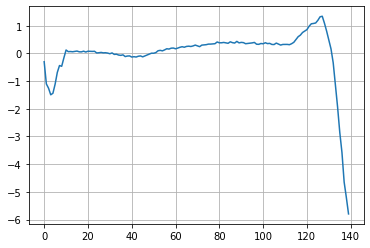

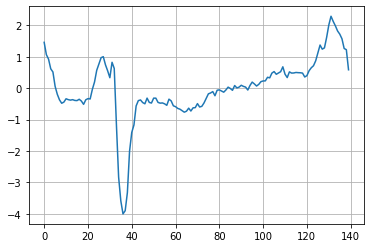

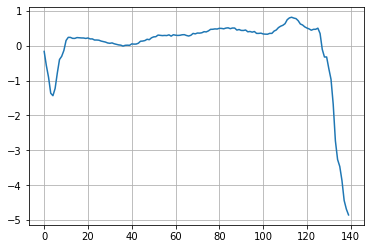

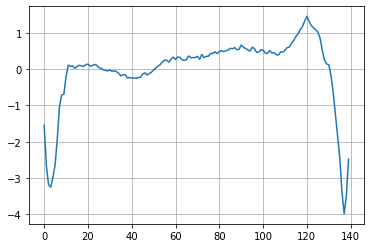

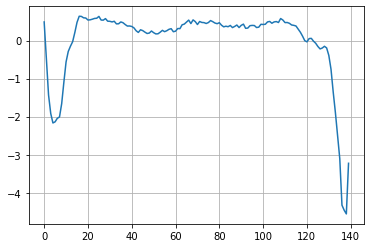

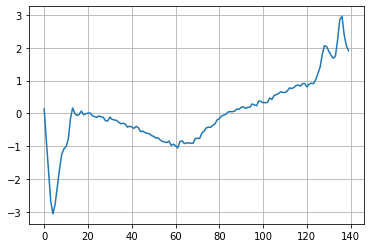

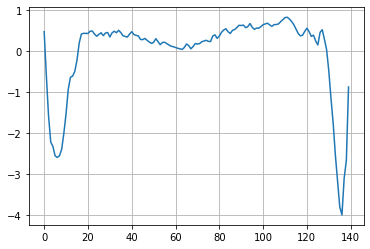

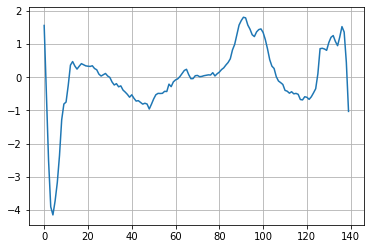

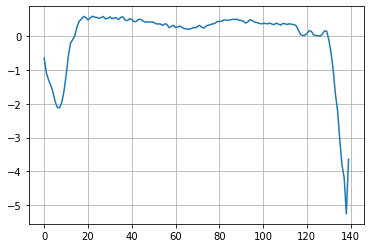

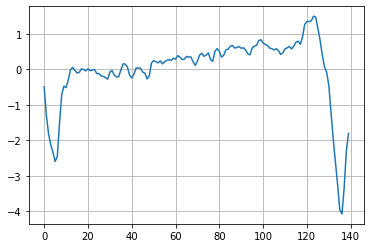

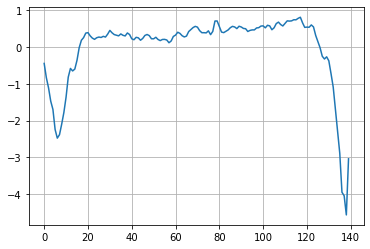

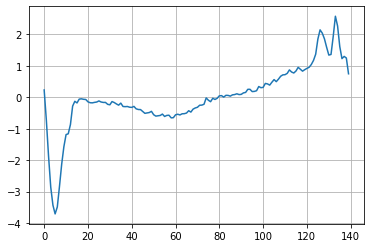

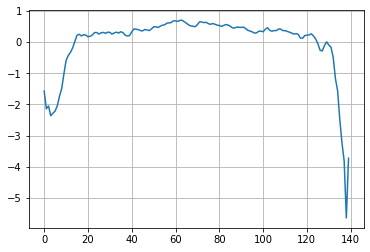

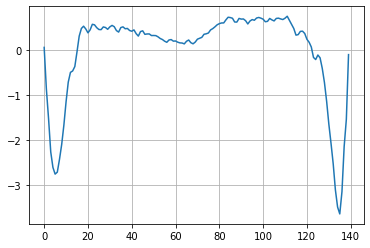

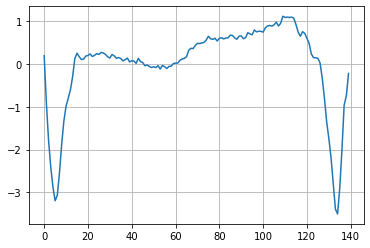

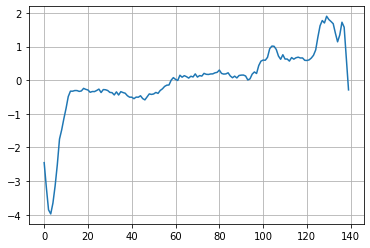

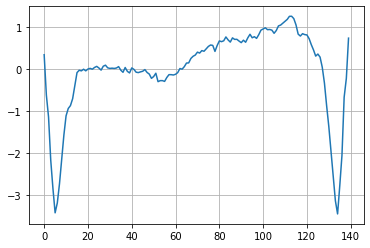

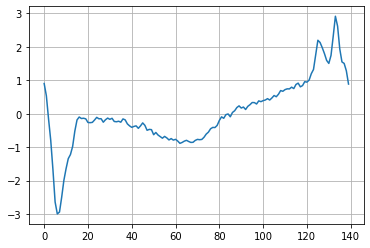

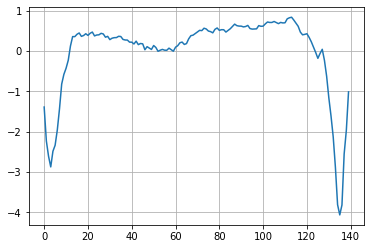

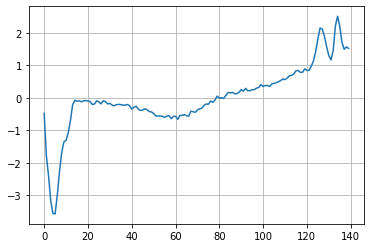

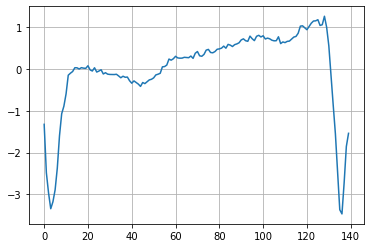

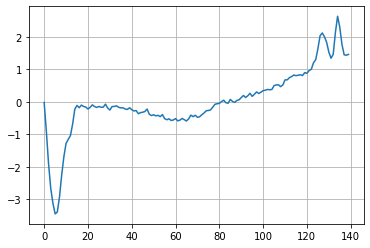

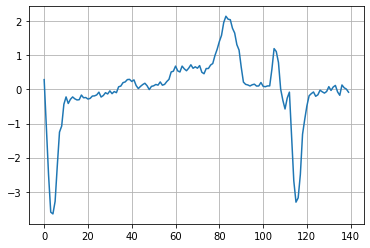

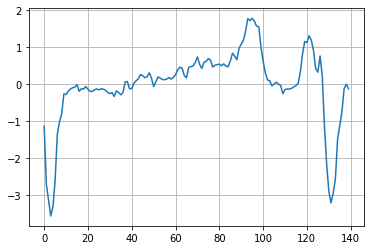

In [13]:
count1=0
for i in range(500):
    if Y[i]==0:
        count1+=1
        plt.figure()
        plt.plot(X[i])
        plt.grid()

In [14]:
count1

208

<ipython-input-15-3a4aa1488d5e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


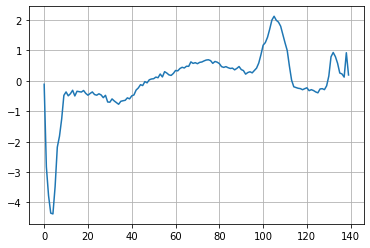

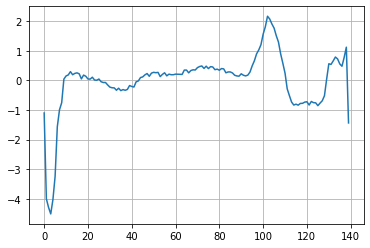

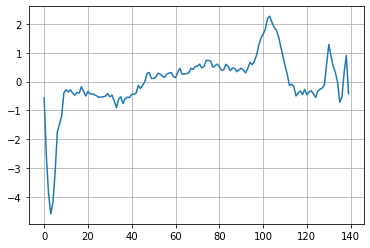

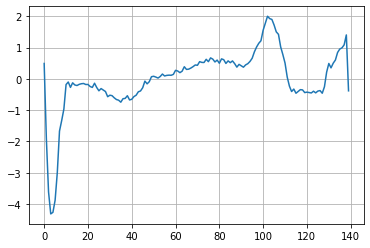

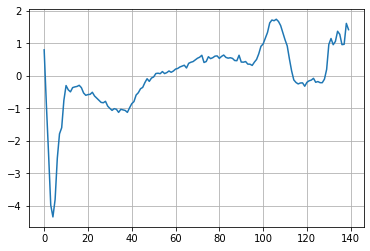

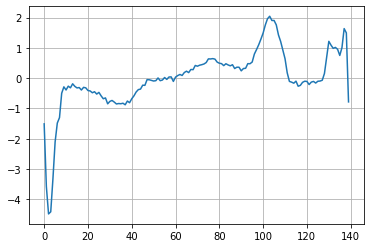

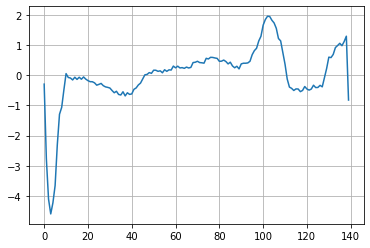

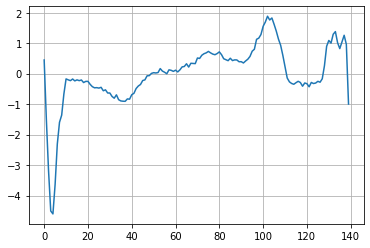

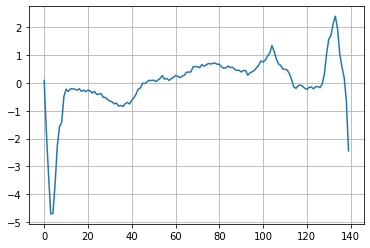

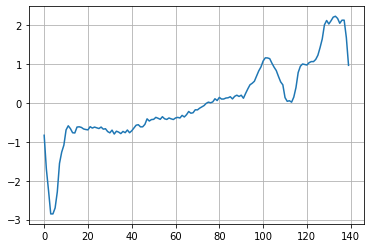

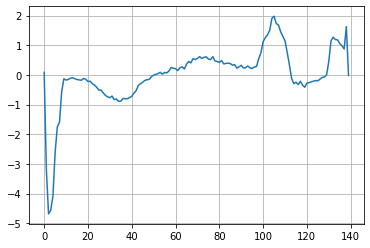

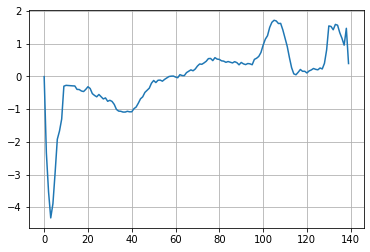

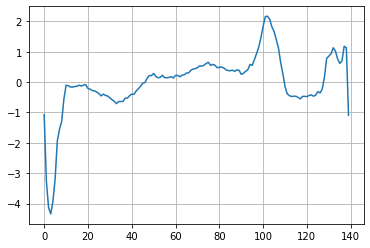

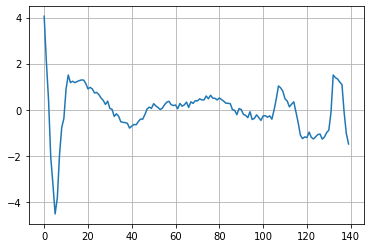

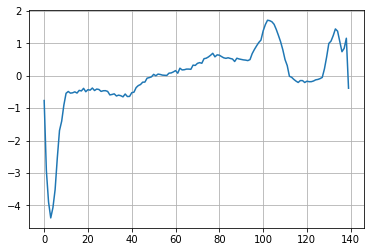

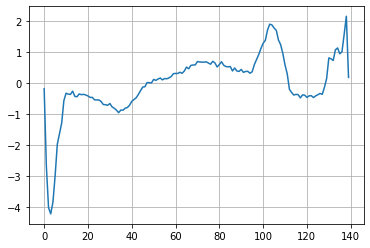

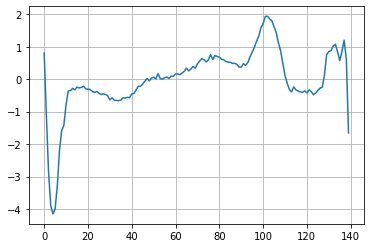

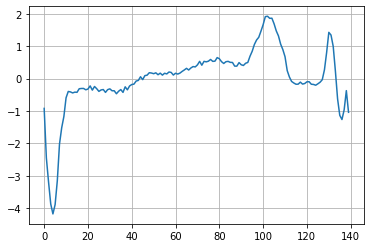

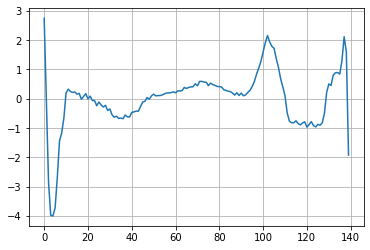

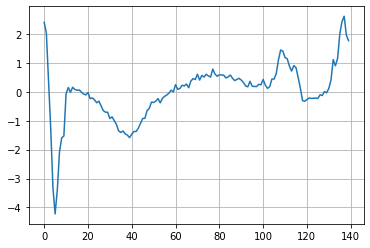

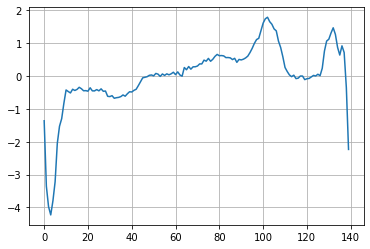

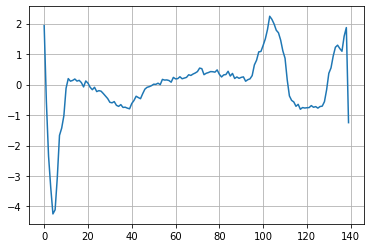

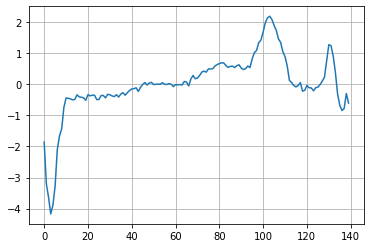

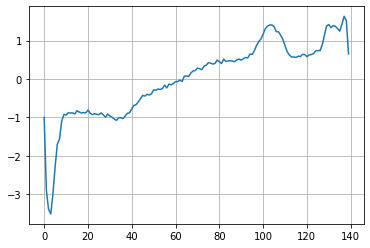

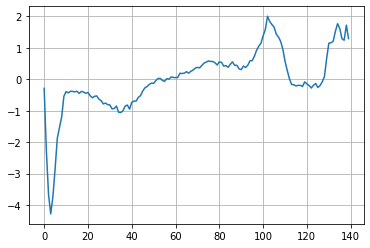

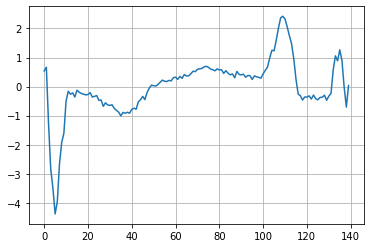

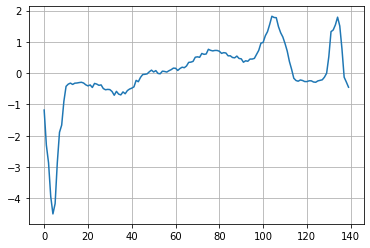

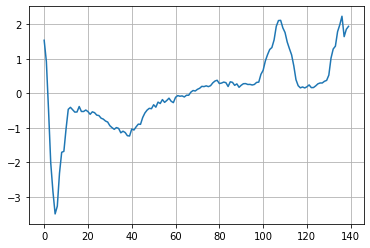

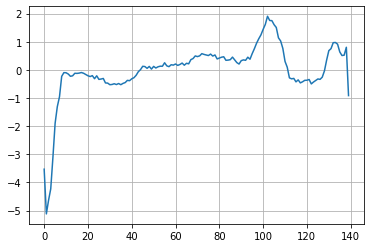

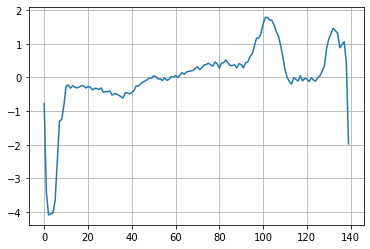

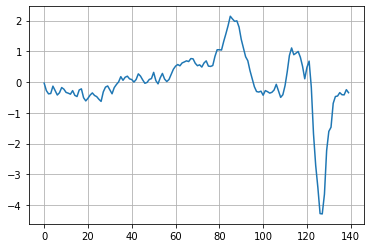

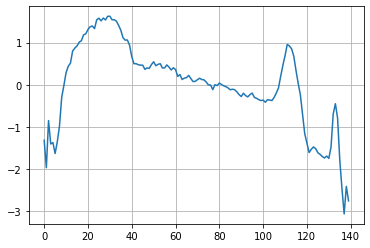

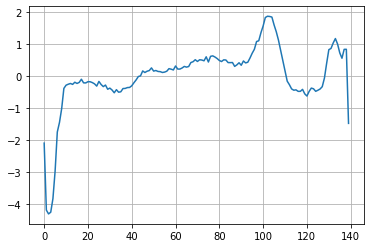

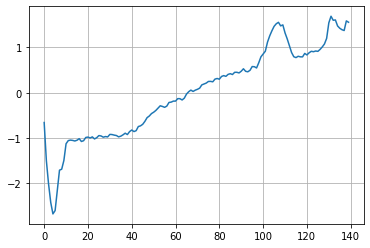

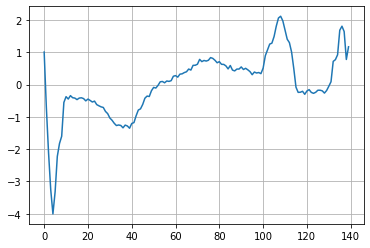

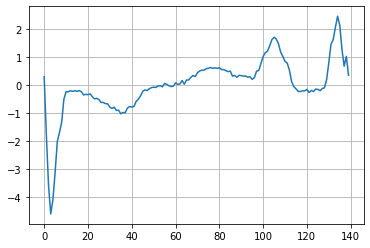

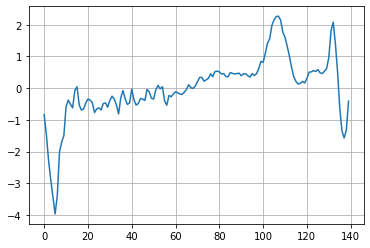

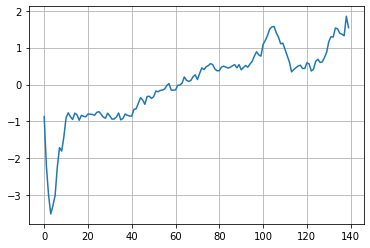

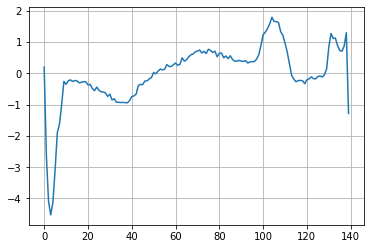

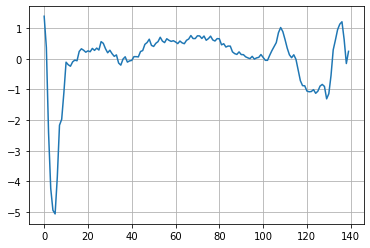

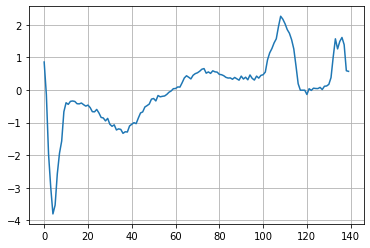

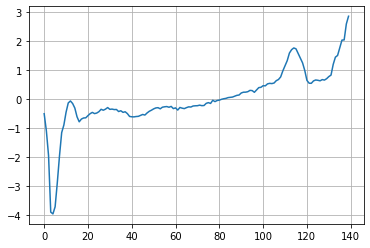

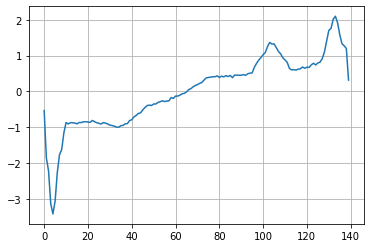

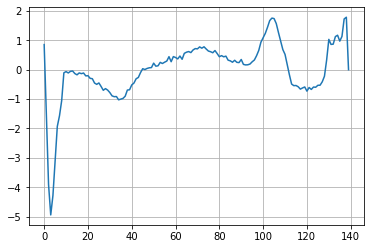

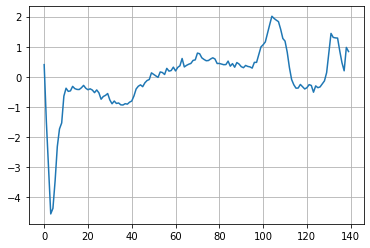

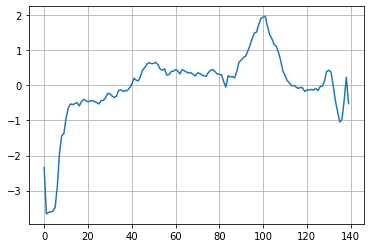

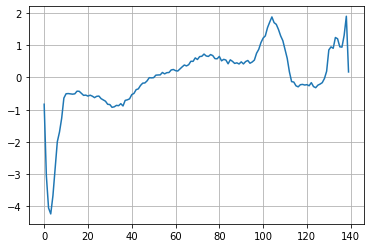

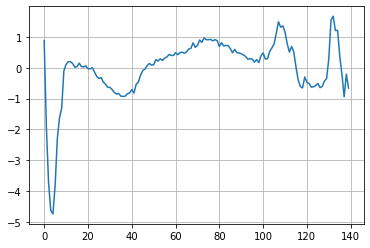

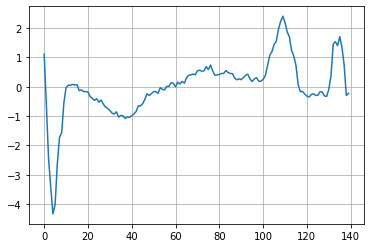

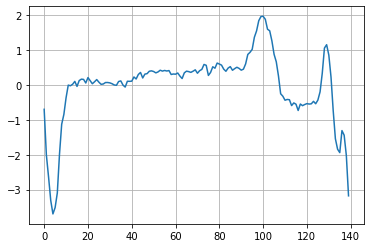

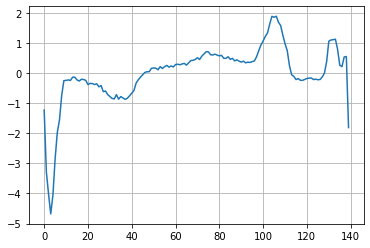

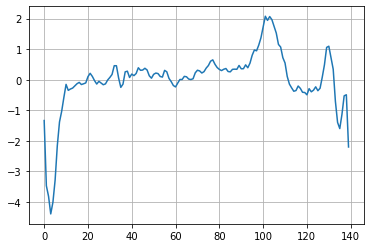

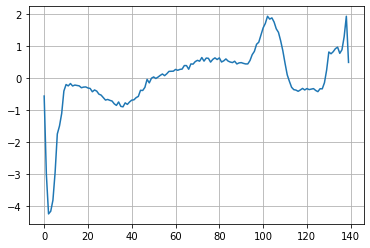

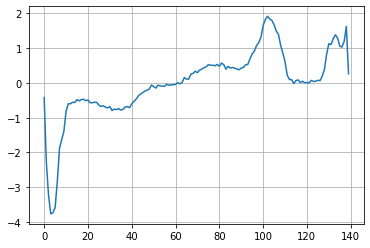

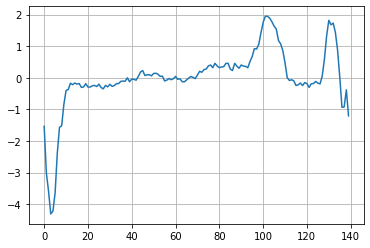

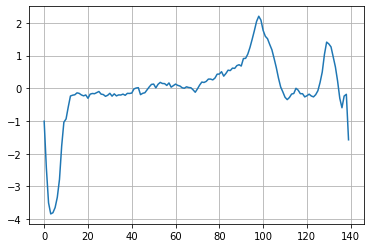

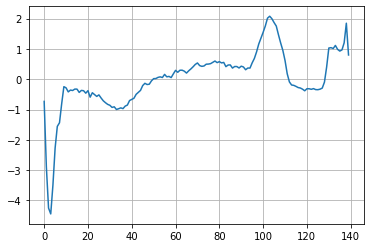

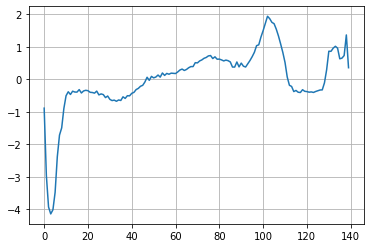

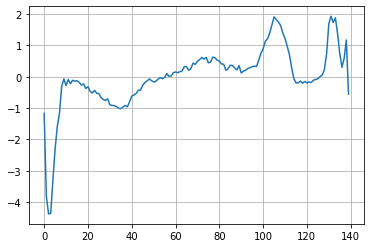

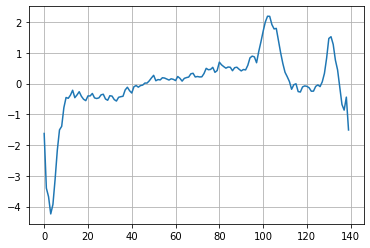

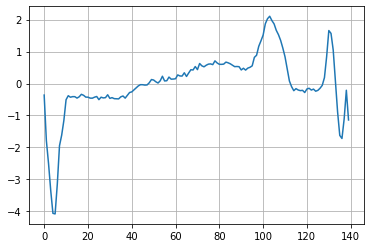

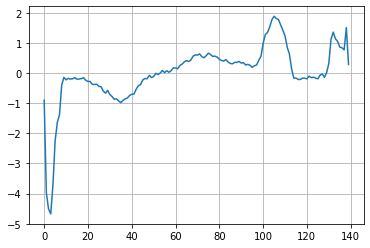

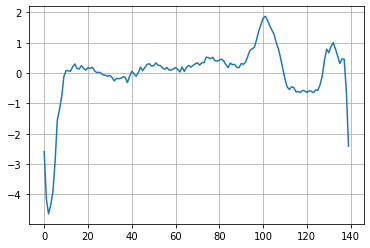

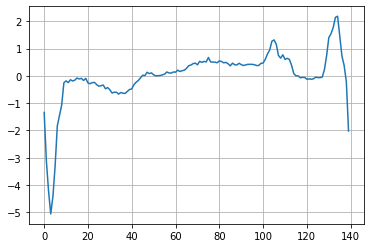

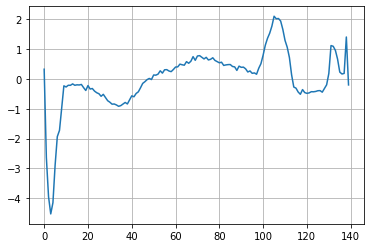

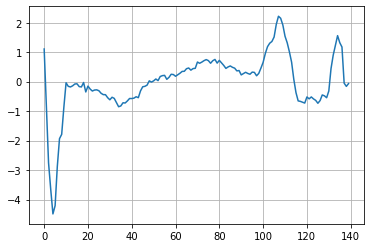

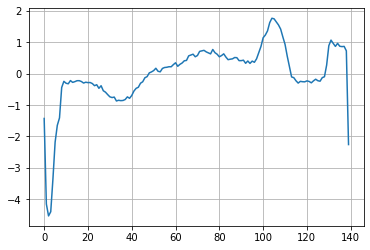

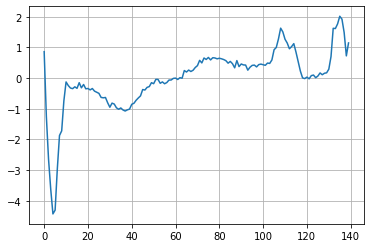

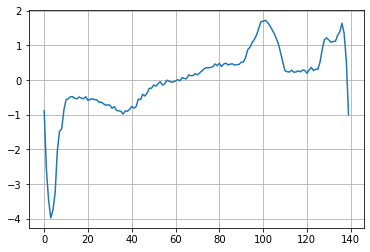

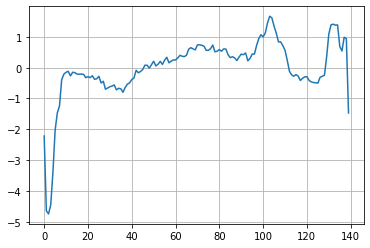

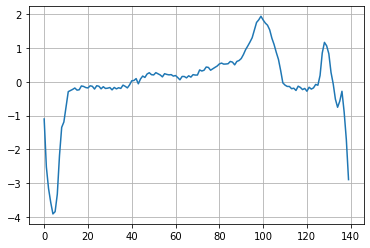

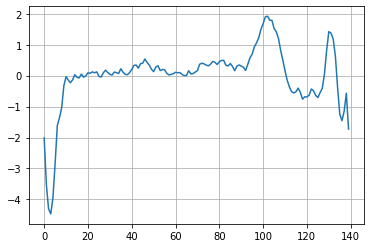

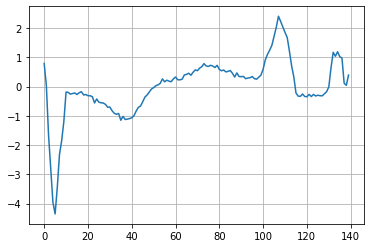

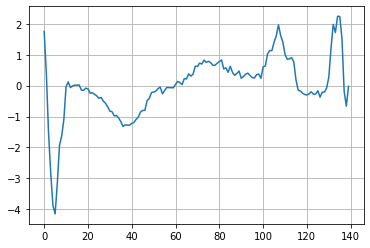

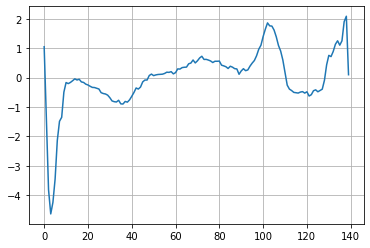

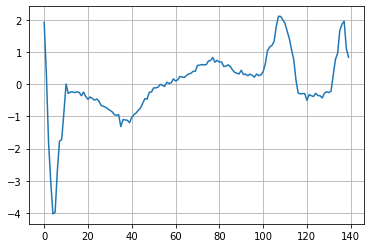

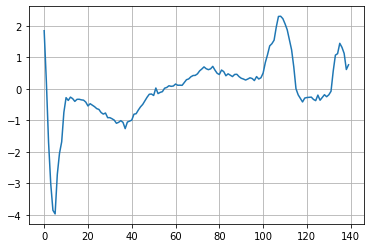

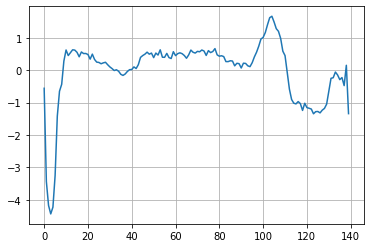

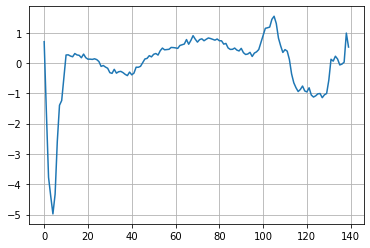

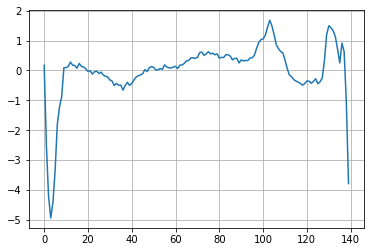

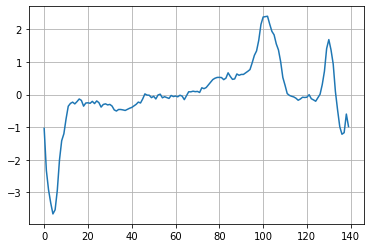

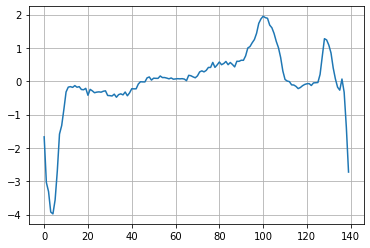

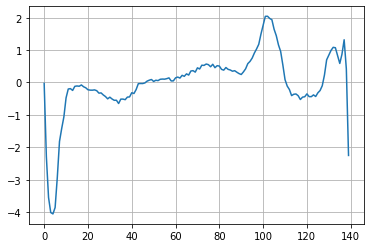

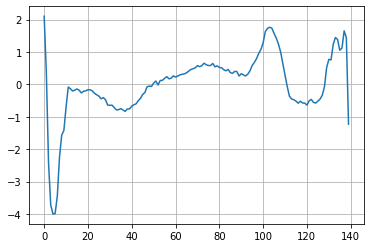

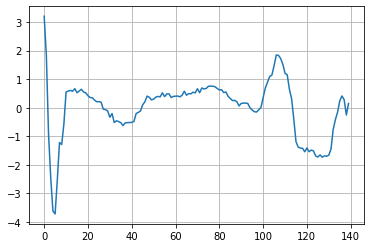

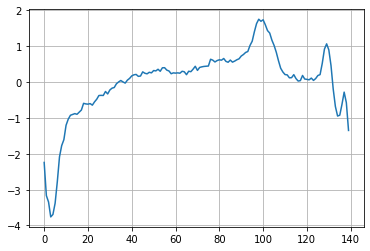

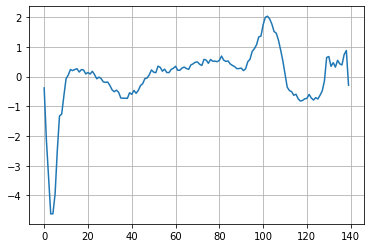

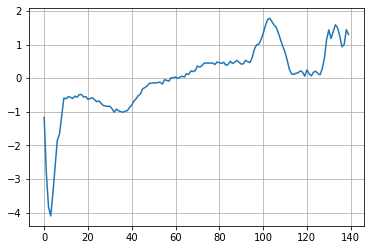

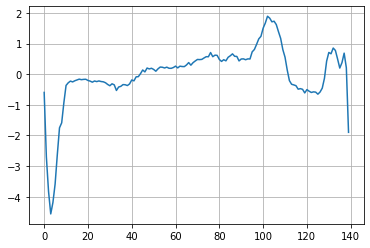

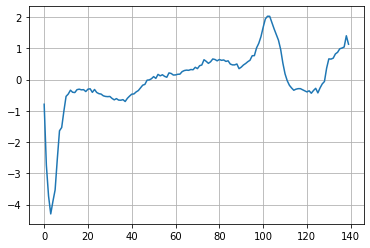

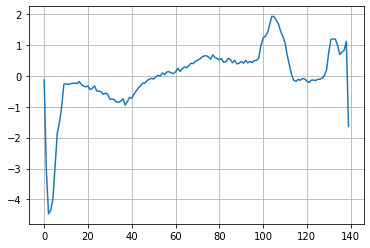

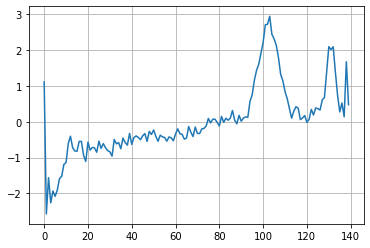

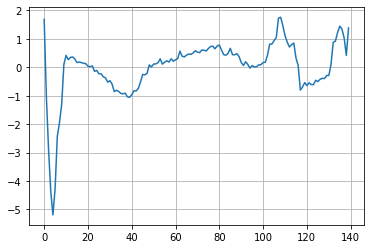

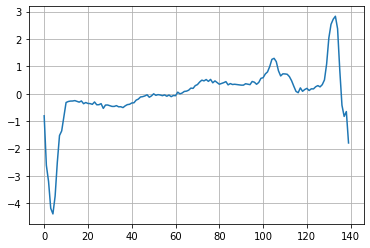

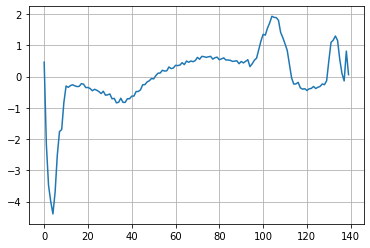

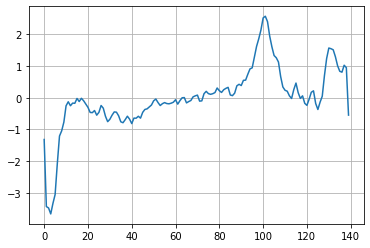

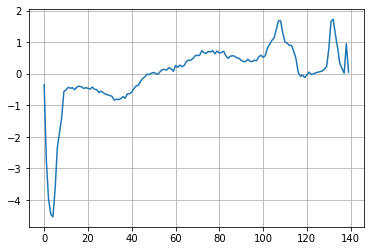

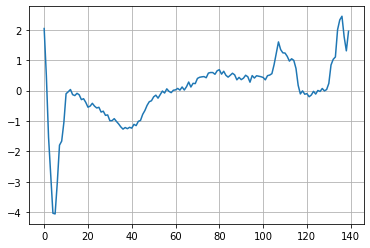

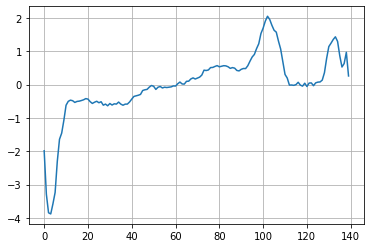

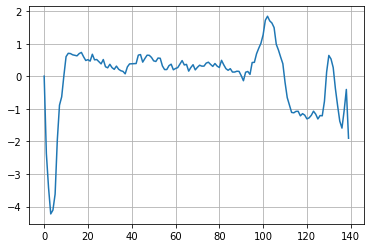

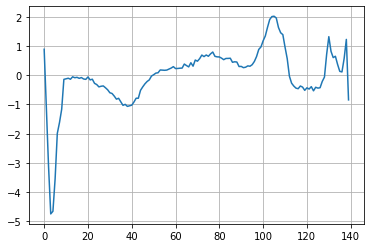

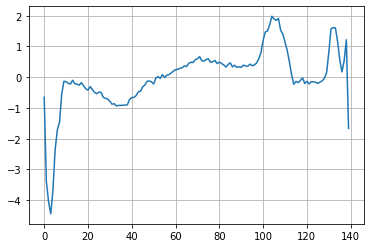

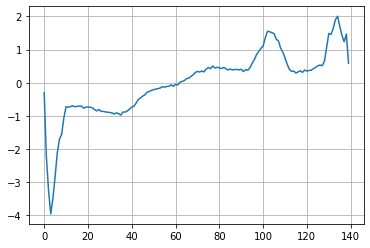

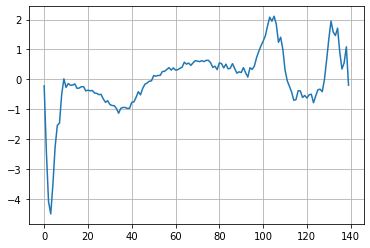

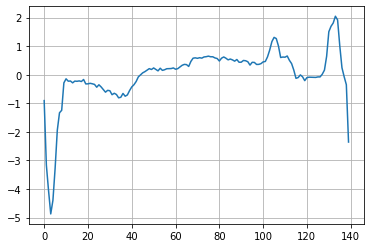

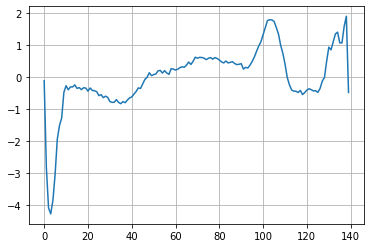

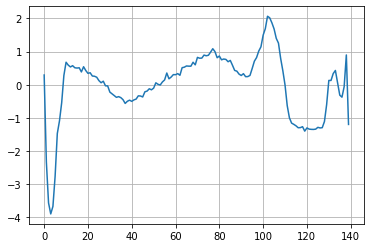

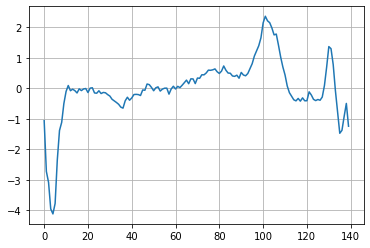

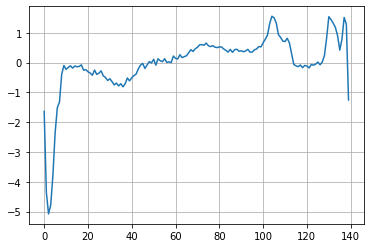

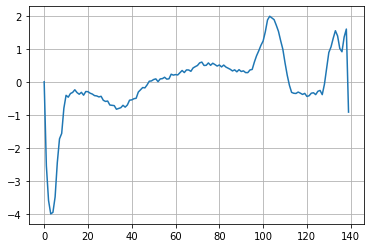

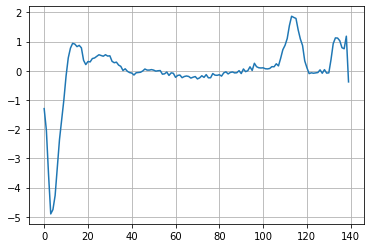

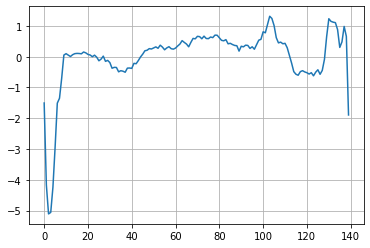

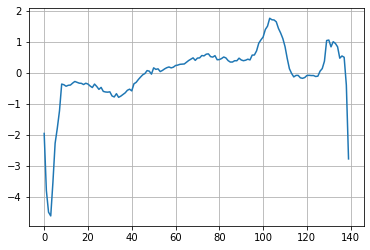

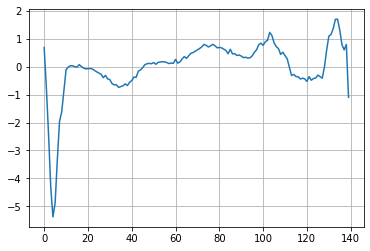

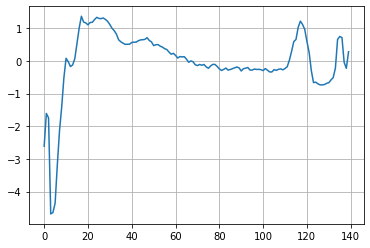

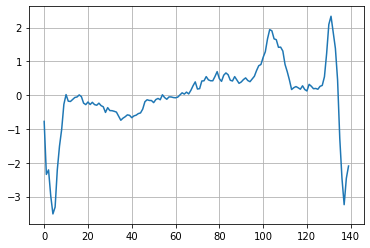

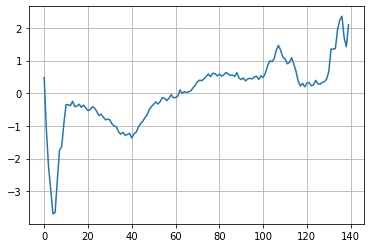

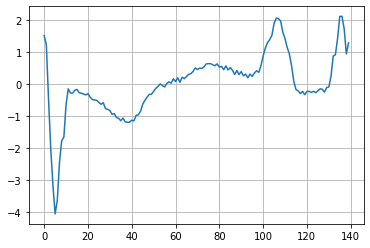

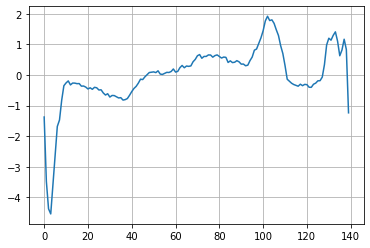

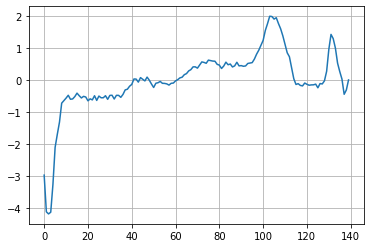

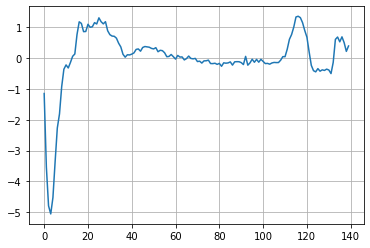

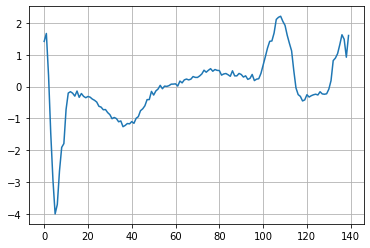

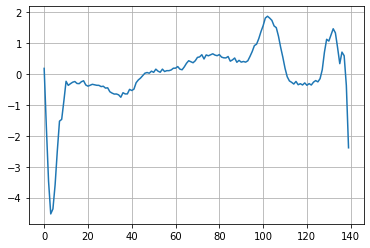

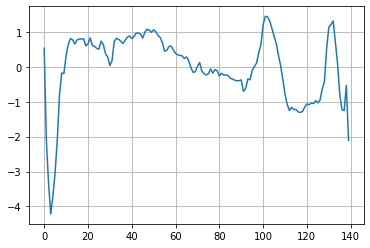

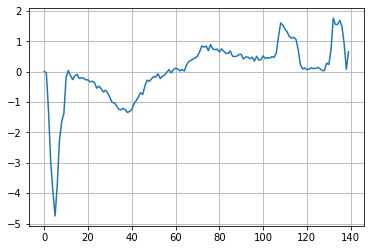

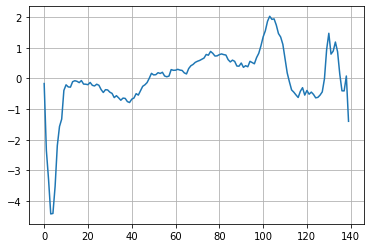

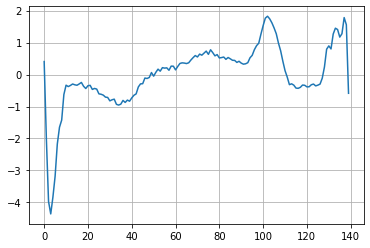

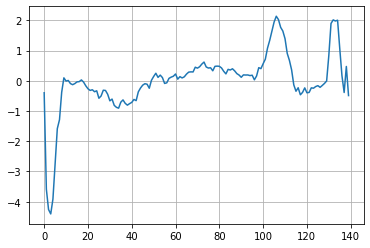

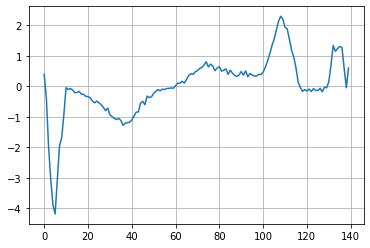

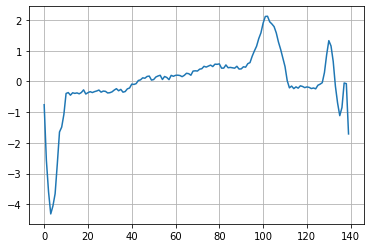

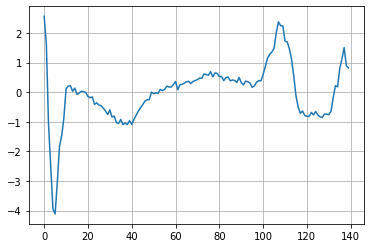

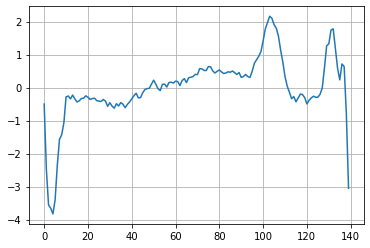

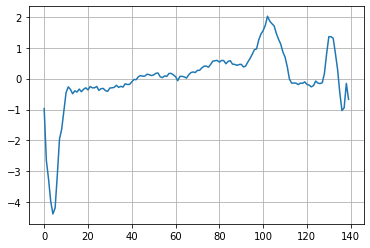

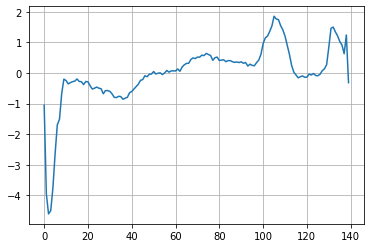

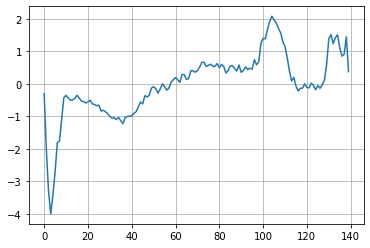

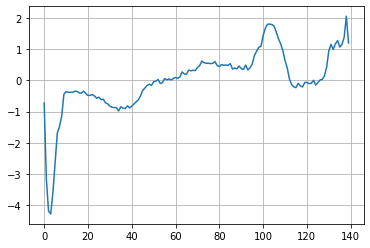

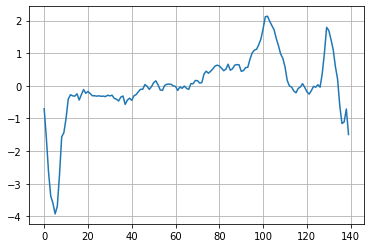

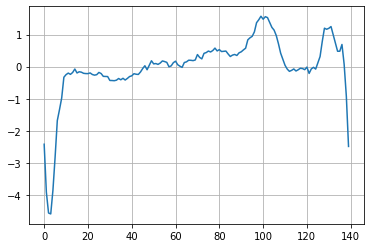

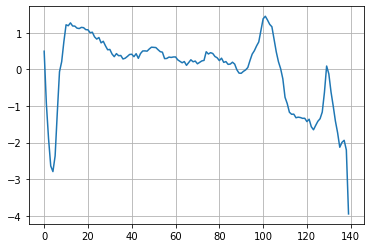

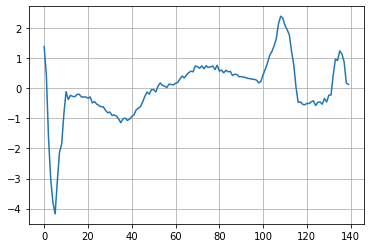

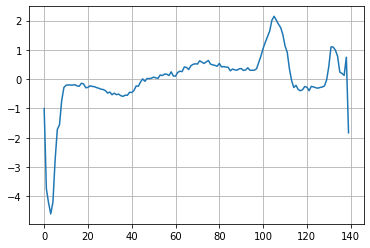

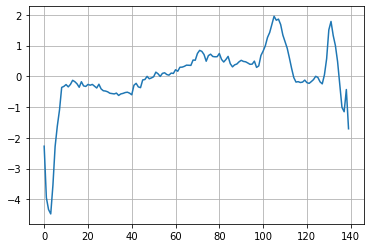

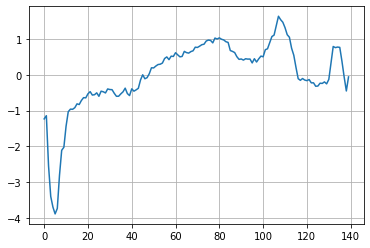

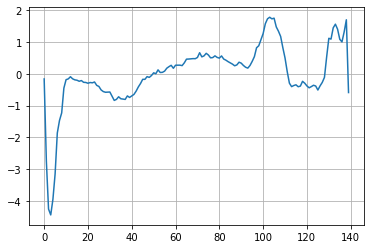

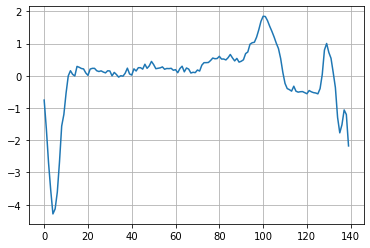

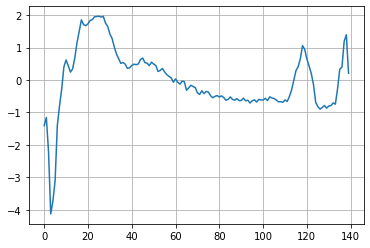

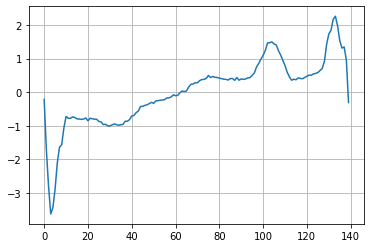

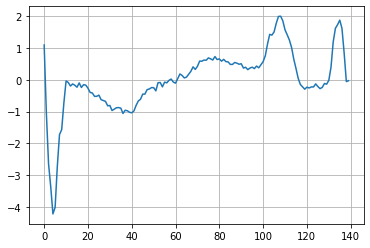

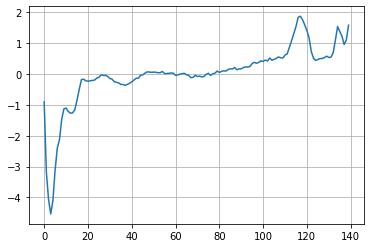

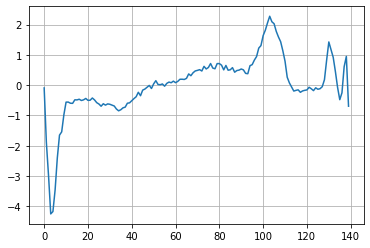

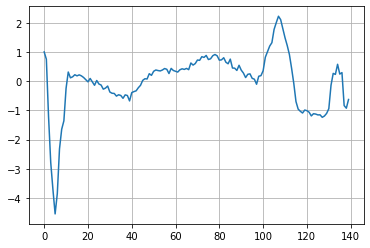

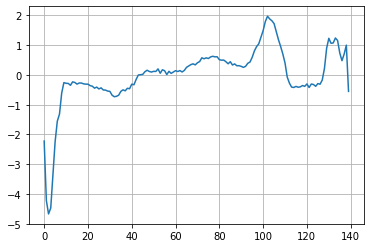

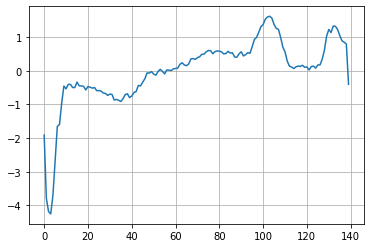

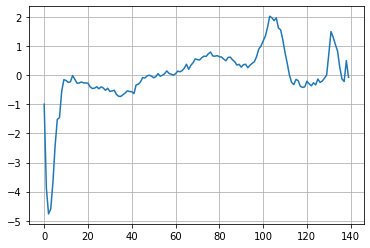

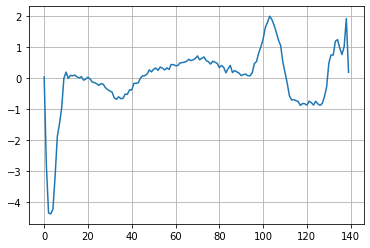

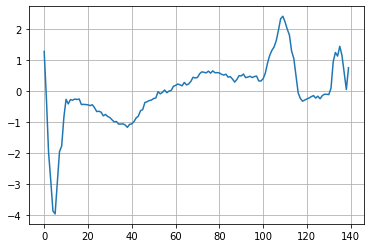

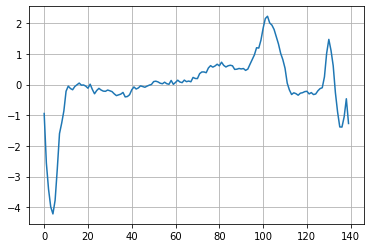

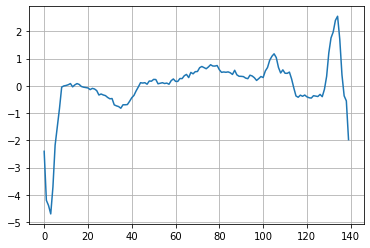

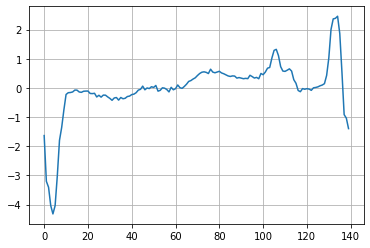

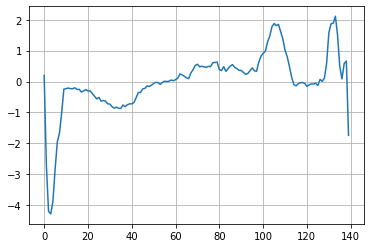

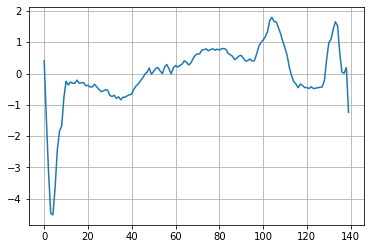

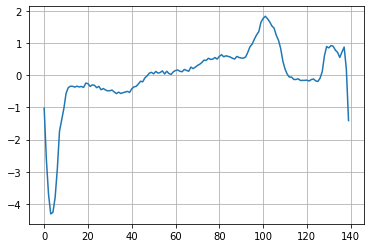

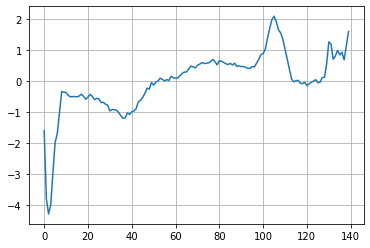

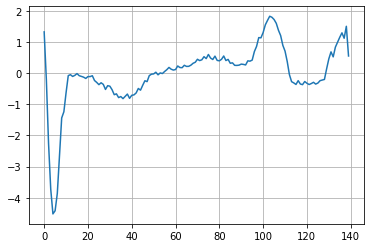

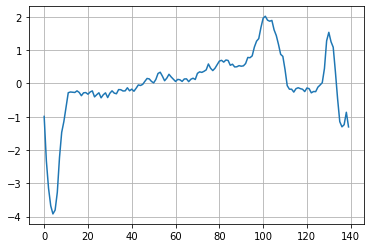

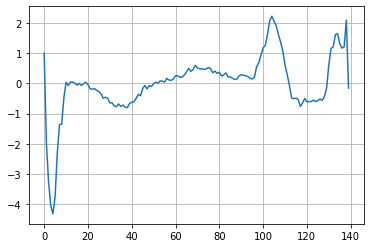

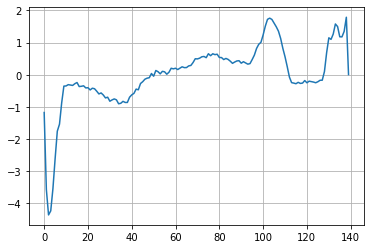

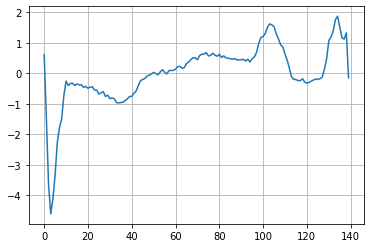

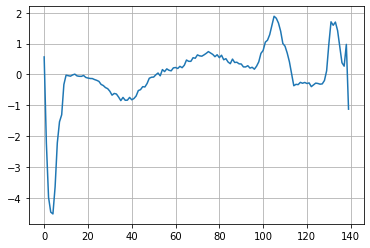

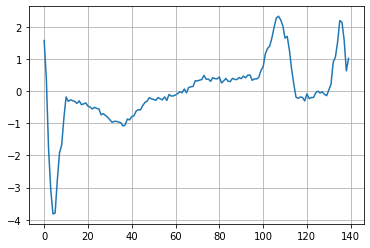

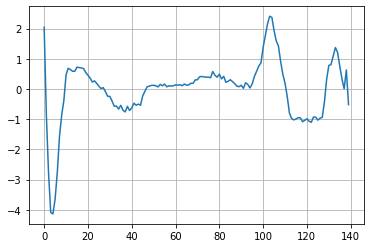

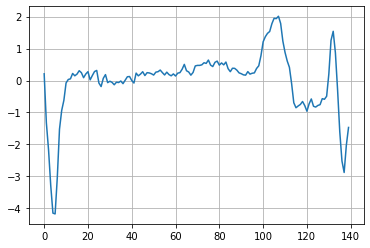

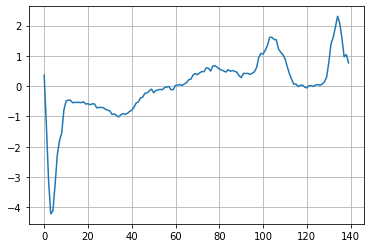

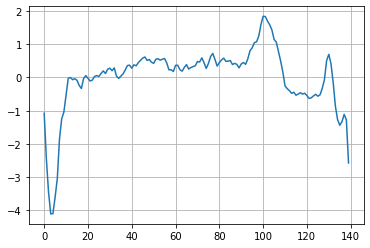

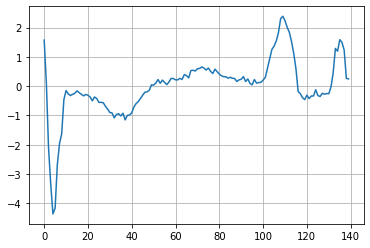

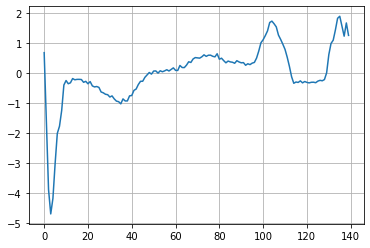

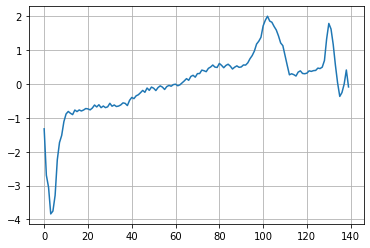

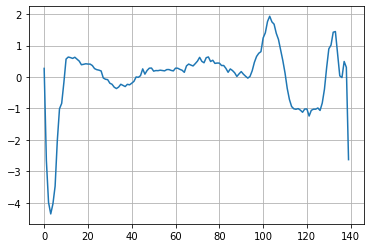

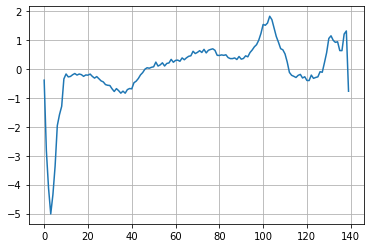

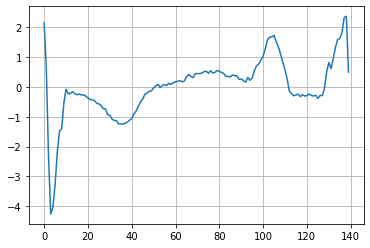

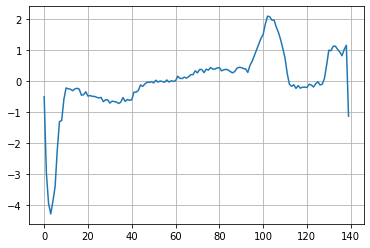

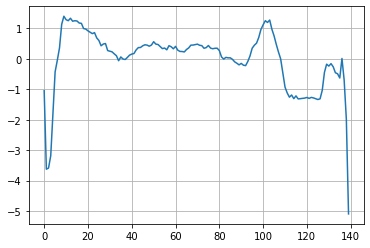

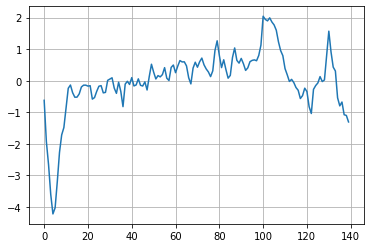

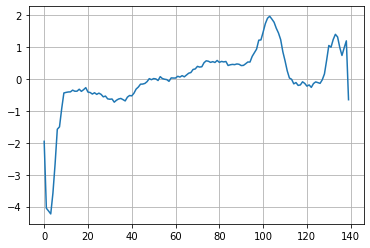

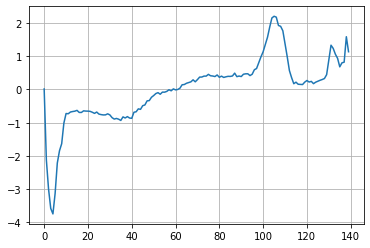

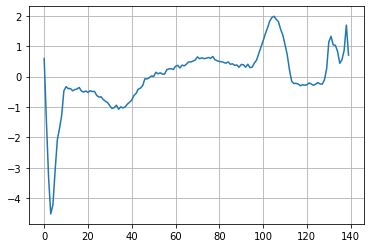

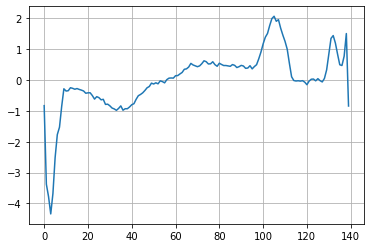

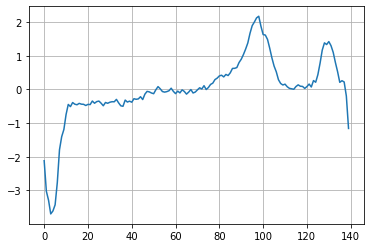

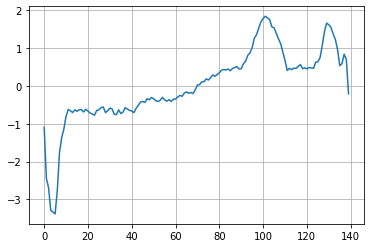

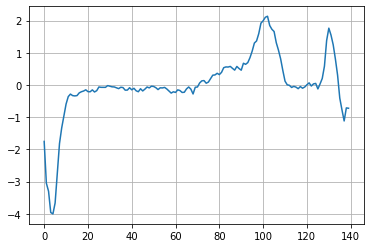

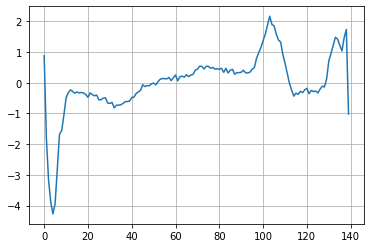

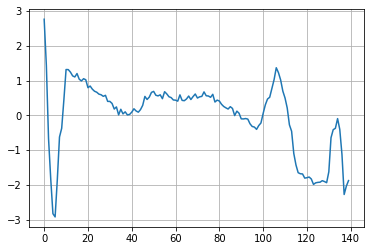

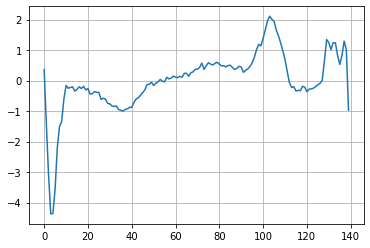

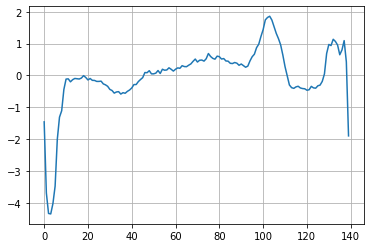

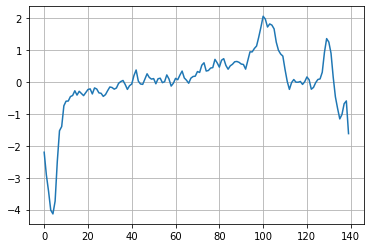

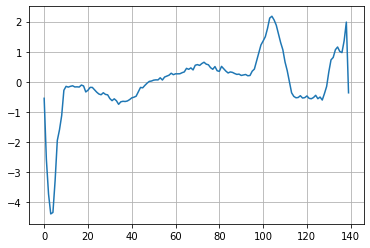

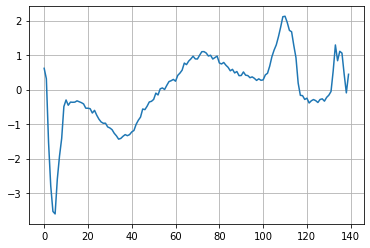

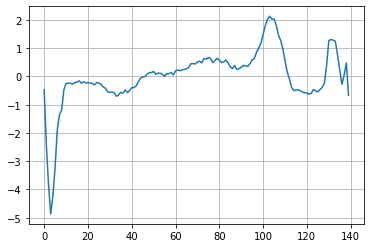

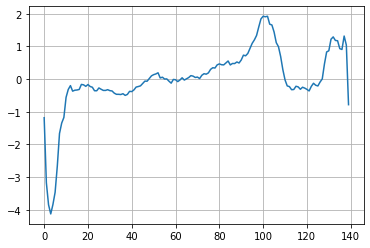

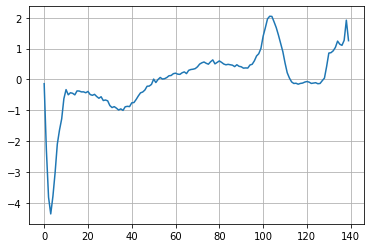

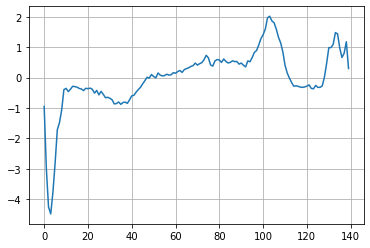

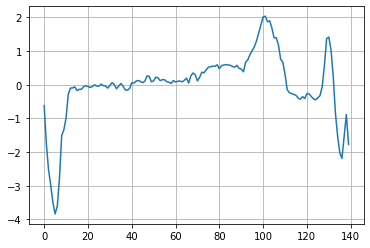

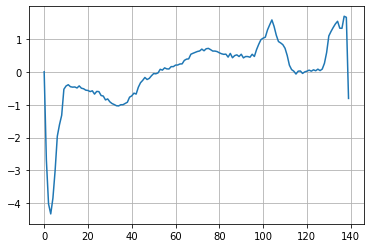

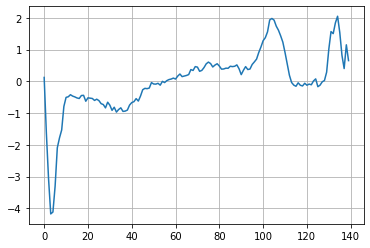

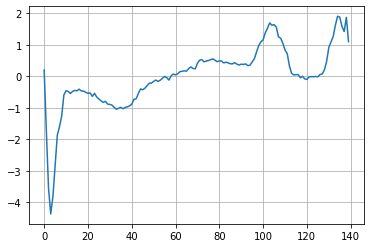

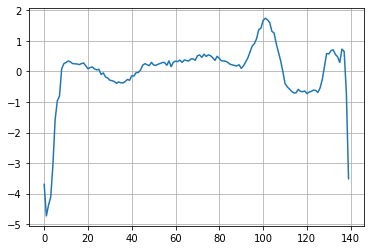

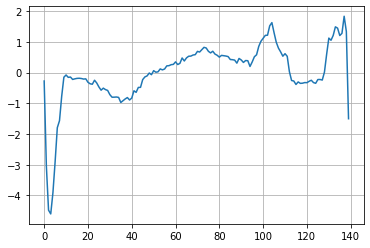

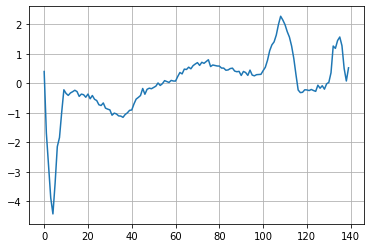

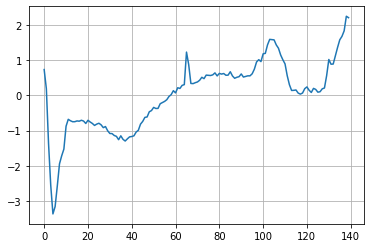

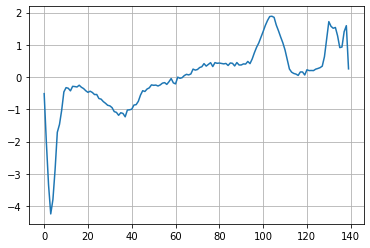

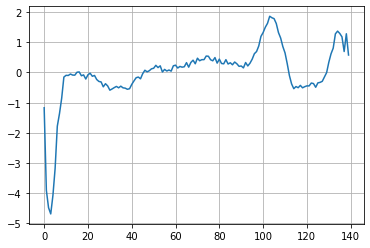

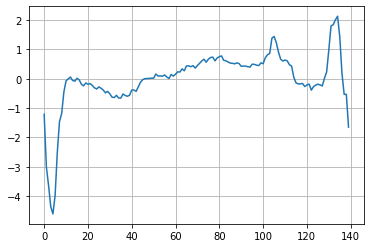

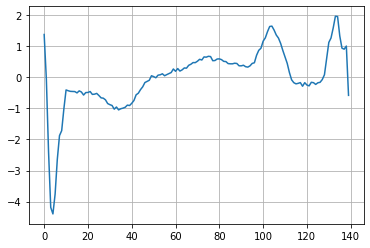

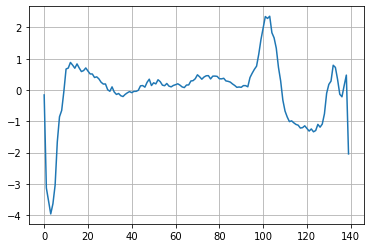

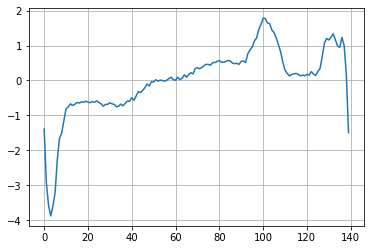

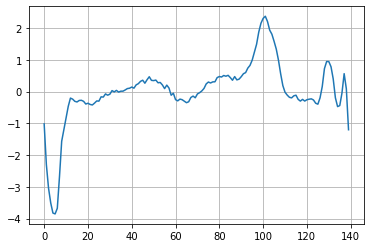

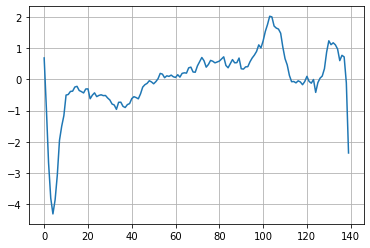

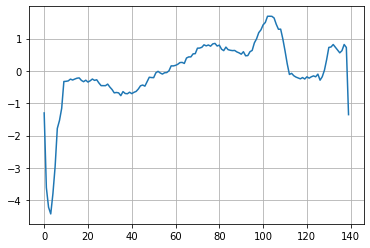

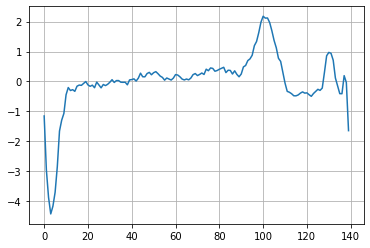

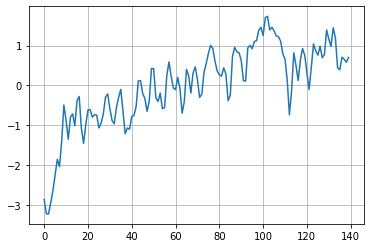

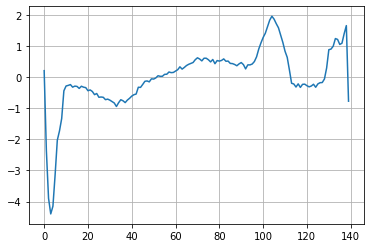

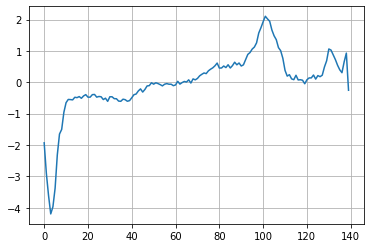

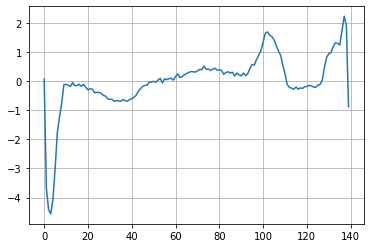

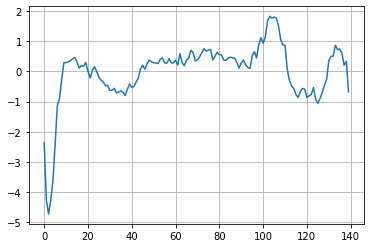

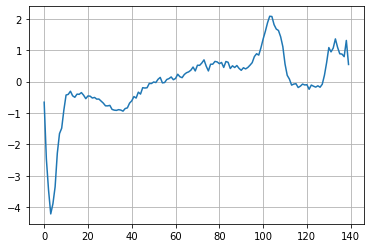

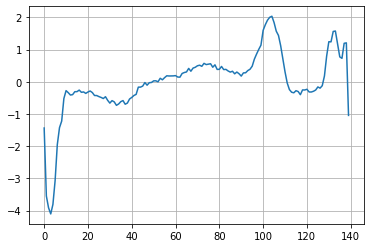

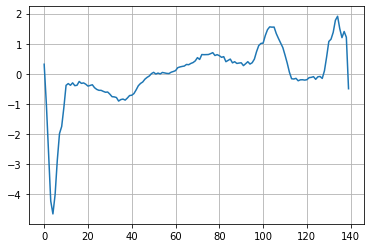

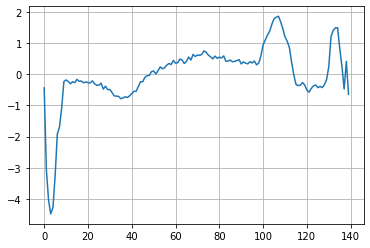

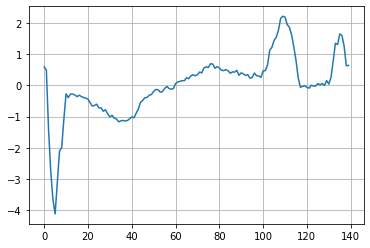

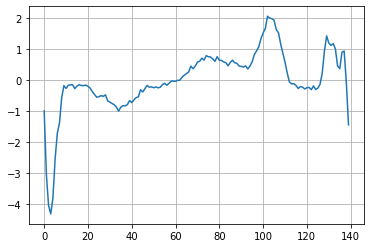

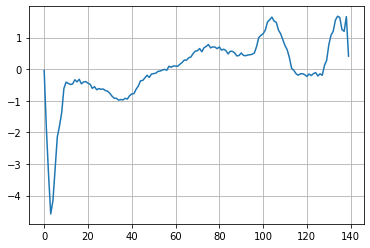

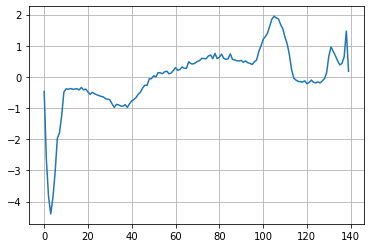

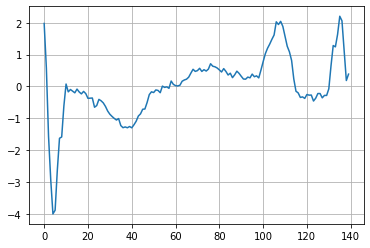

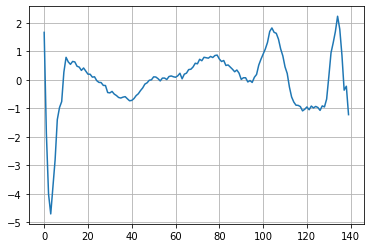

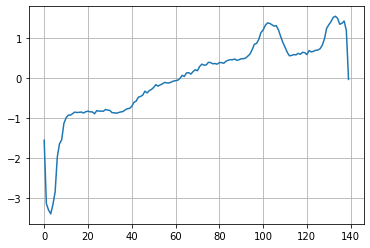

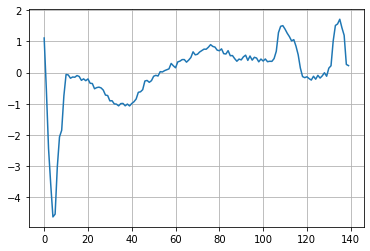

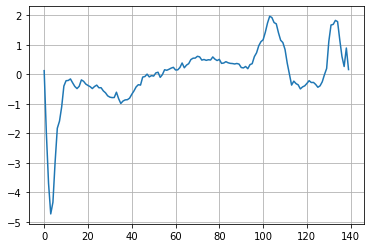

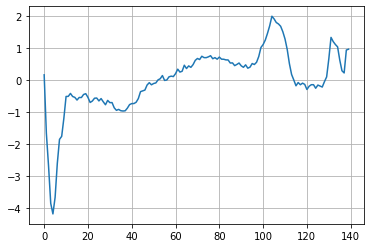

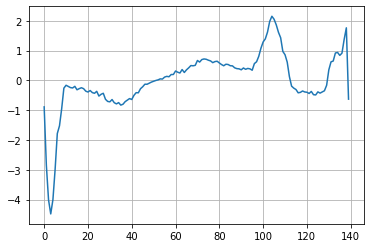

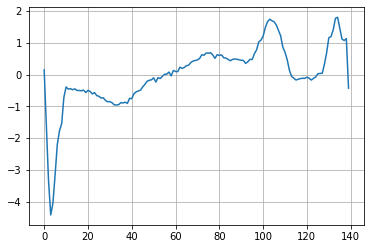

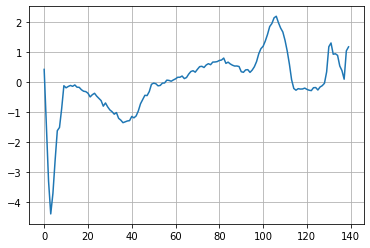

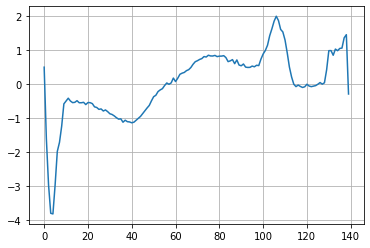

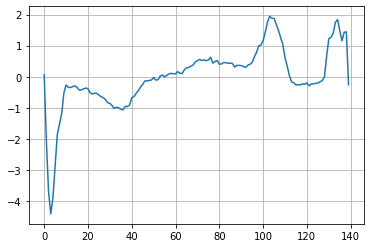

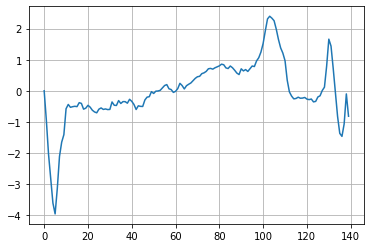

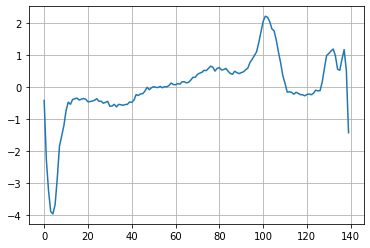

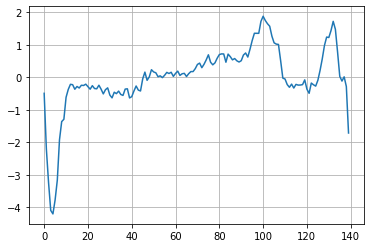

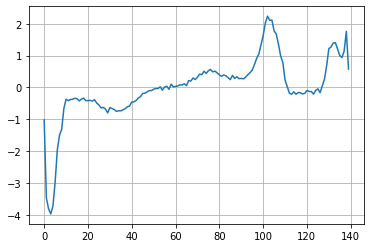

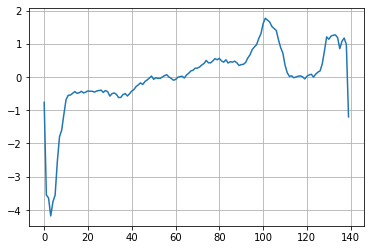

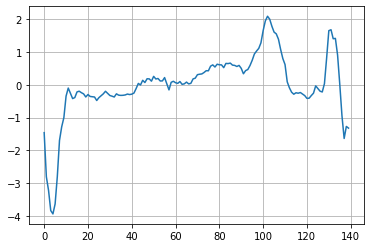

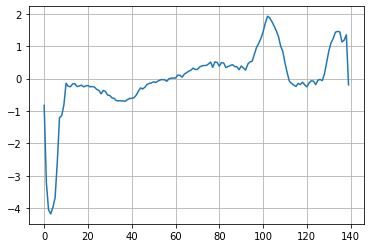

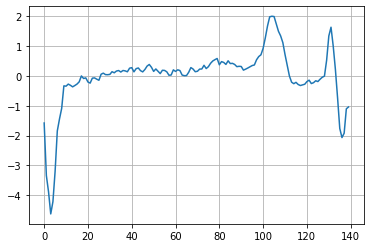

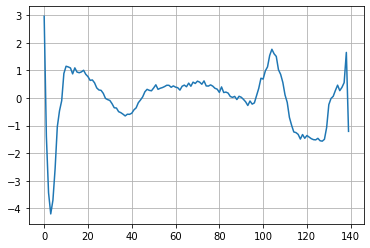

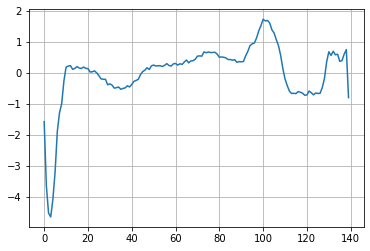

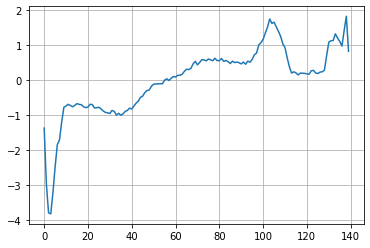

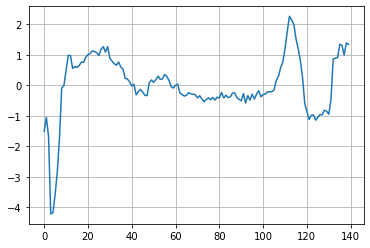

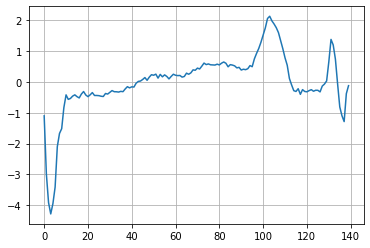

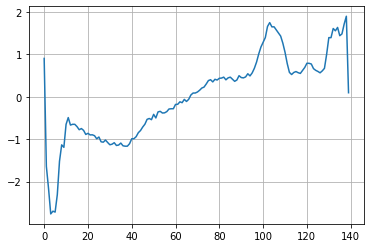

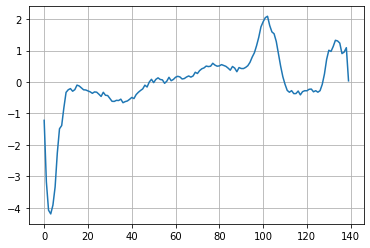

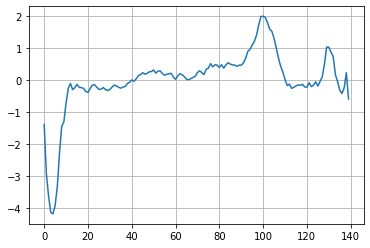

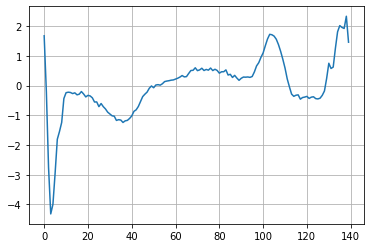

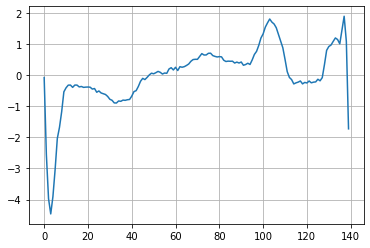

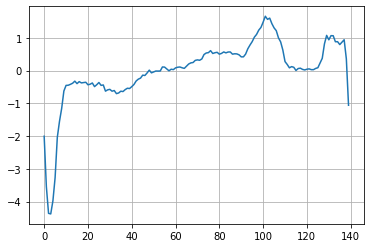

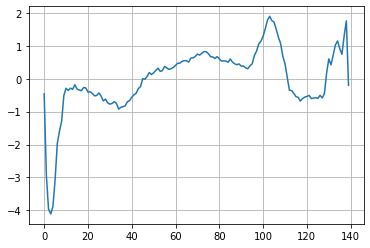

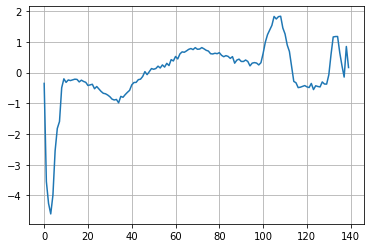

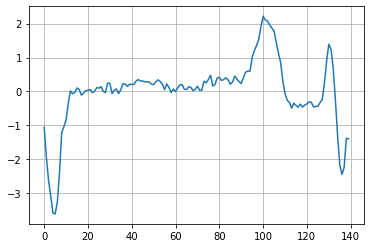

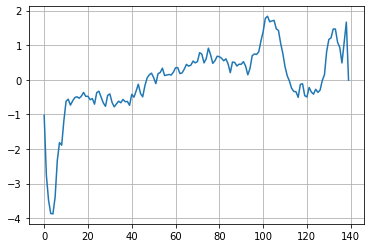

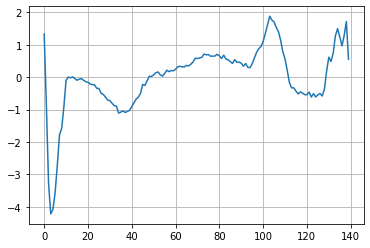

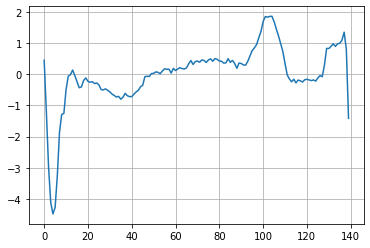

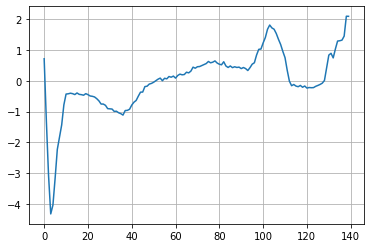

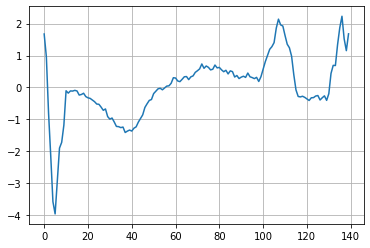

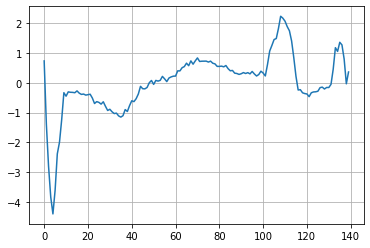

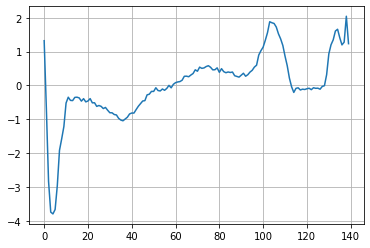

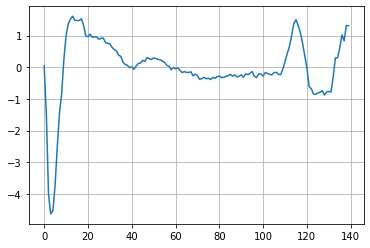

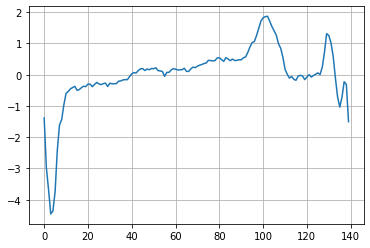

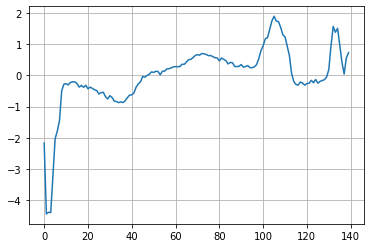

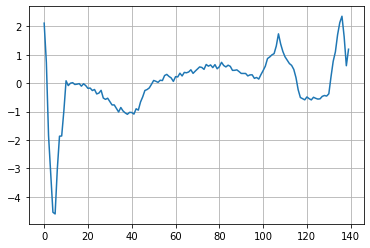

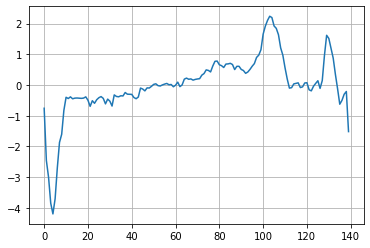

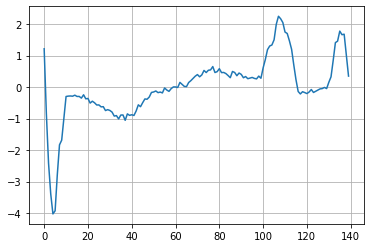

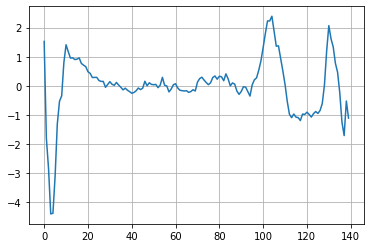

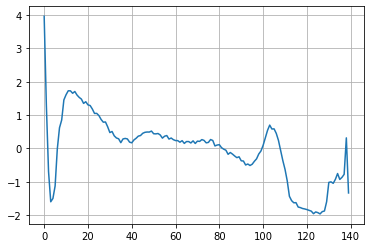

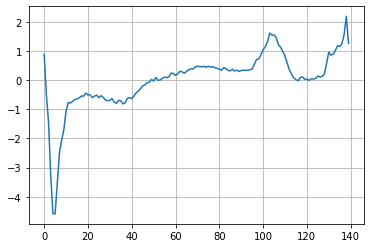

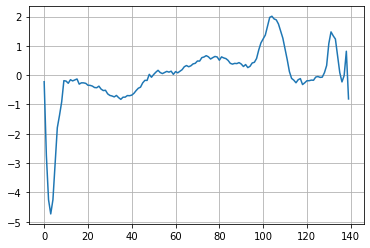

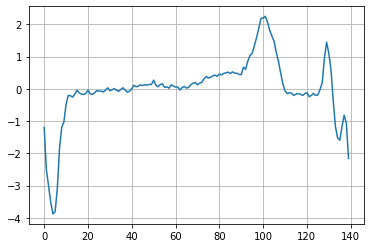

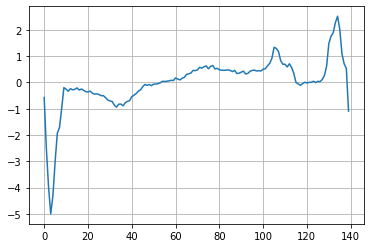

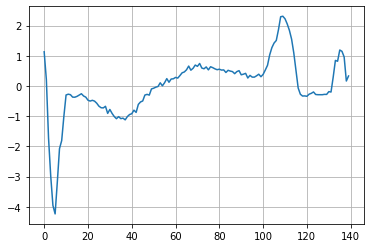

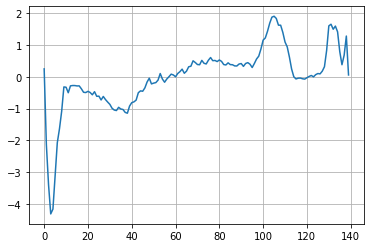

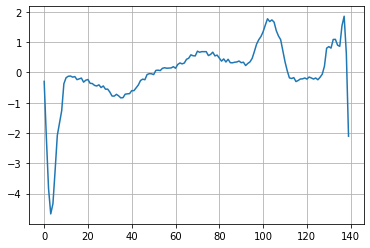

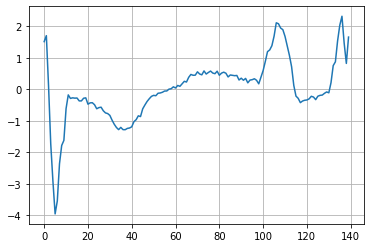

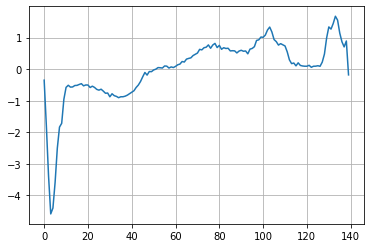

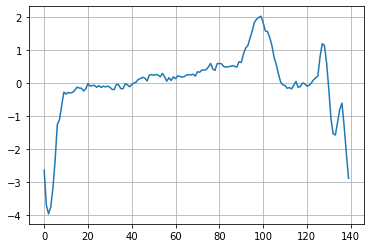

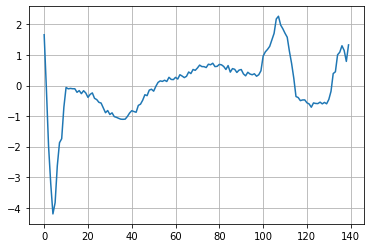

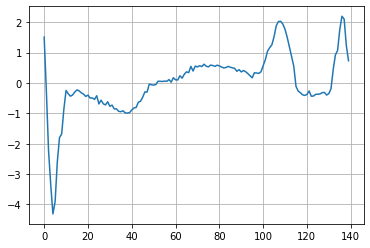

In [15]:
count2=0
for i in range(500):
    if Y[i]==1:
        count2+=1
        plt.figure()
        plt.plot(X[i])
        plt.grid()

In [16]:
count2

292

In [17]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)

Y_pred=LR.predict(X_test)
# for i in range(len(X_test)):
#     print(Y_pred[i],Y_test[i])

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred)*100)

98.7


C:\Users\tiruv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

Y_pred=LR.predict(X_test)
# for i in range(len(X_test)):
#     print(np.round(Y_pred[i]),Y_test[i])

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,np.round(Y_pred))*100)

98.1


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =100,criterion='entropy',max_depth=100, random_state = 42)
classifier.fit(X_train, Y_train)


Y_pred=classifier.predict(X_test)
# for i in range(len(X_test)):
#     print(np.round(Y_pred[i]),Y_test[i])

print(accuracy_score(Y_test,np.round(Y_pred))*100)

98.7
